___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [107]:
import pandas as pd
import numpy as np
#plotting
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
#scaling/encoding/transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer
#models/pipeline
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#evaluation
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score
#from svm_margin_plot import plot_svm_boundary
#SMOTE, SHAP, PCA, pickle
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import shap
from sklearn.decomposition import PCA
import pickle

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
female_df = pd.read_csv('ANSUR II FEMALE Public.csv')
female_df.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  ...                  Branch  PrimaryMOS  \
0                        315  ...          Combat Support         92Y   
1                        272  ...  Combat Service Support         25U   
2                        300  ...  Combat Service Support         35D   
3                        364  ...  Combat Service Support         25U   
4                        320  ...             Combat Arms         42A   

   SubjectsBirthLocation  SubjectNumericRace           Ethnicity  DODRace  \
0                Germany                   2                 NaN        2   
1             California                   3             Mexican        3   
2                  Texas                   1                 NaN        1   
3   District of Columbia                   8  Caribbean Islander        2   
4                  Texas                   1                 NaN        1   

   Age  Heightin  Weightlbs  WritingPreference  
0   26        61        142         Right hand  
1   21        64        120         Right hand  
2   23        68        147         Right hand  
3   22        66        175         Right hand  
4   45        63        195         Right hand  

[5 rows x 108 columns]

## Explore Data

In [3]:
#decoder utf-8 can not read the file so changed the encoding
male_df = pd.read_csv('ANSUR II MALE Public.csv', encoding = "ISO-8859-1")
male_df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  ...                  Branch  PrimaryMOS  \
0                        369  ...             Combat Arms         19D   
1                        338  ...          Combat Support         68W   
2                        408  ...          Combat Support         68W   
3                        359  ...  Combat Service Support         88M   
4                        356  ...  Combat Service Support         92G   

   SubjectsBirthLocation  SubjectNumericRace  Ethnicity  DODRace  Age  \
0           North Dakota                   1        NaN        1   41   
1               New York                   1        NaN        1   35   
2               New York                   2        NaN        2   42   
3              Wisconsin                   1        NaN        1   31   
4         North Carolina                   2        NaN        2   21   

   Heightin  Weightlbs  WritingPreference  
0        71        180         Right hand  
1        68        160          Left hand  
2        68        205          Left hand  
3        66        175         Right hand  
4        77        213         Right hand  

[5 rows x 108 columns]

In [4]:
#check for duplicates on both datasets
print('duplicate values in females: ', female_df['SubjectId'].duplicated().sum(),
     '\nduplicate values in males: ', male_df['subjectid'].duplicated().sum())

duplicate values in females:  0 
duplicate values in males:  0


In [5]:
#making sure columns are the same before concatinating
female_columns = female_df.columns
female_columns.difference(male_df.columns) #only difference is a column we are going to delete

Index(['SubjectId'], dtype='object')

In [6]:
df = pd.merge(female_df.drop(columns = ['SubjectId']),
              male_df.drop(columns = ['subjectid']), how = 'outer')

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 6067
Data columns (total 107 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    abdominalextensiondepthsitting  6068 non-null   int64 
 1    acromialheight                  6068 non-null   int64 
 2    acromionradialelength           6068 non-null   int64 
 3    anklecircumference              6068 non-null   int64 
 4    axillaheight                    6068 non-null   int64 
 5    balloffootcircumference         6068 non-null   int64 
 6    balloffootlength                6068 non-null   int64 
 7    biacromialbreadth               6068 non-null   int64 
 8    bicepscircumferenceflexed       6068 non-null   int64 
 9    bicristalbreadth                6068 non-null   int64 
 10   bideltoidbreadth                6068 non-null   int64 
 11   bimalleolarbreadth              6068 non-null   int64 
 12   bitragionchinarc                

In [7]:
df.shape

(6068, 107)

In [8]:
#checking null values of all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
df.isna().sum()

abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth                           0
chestheight              

In [9]:
df.describe().T

count         mean         std     min  \
abdominalextensiondepthsitting  6068.0   246.468688   37.400106   155.0   
acromialheight                  6068.0  1406.161338   79.091048  1115.0   
acromionradialelength           6068.0   327.374423   20.720018   249.0   
anklecircumference              6068.0   224.891397   16.051833   156.0   
axillaheight                    6068.0  1299.608767   72.022286  1038.0   
balloffootcircumference         6068.0   244.192650   16.845020   186.0   
balloffootlength                6068.0   194.754614   13.516368   151.0   
biacromialbreadth               6068.0   399.204186   30.236914   283.0   
bicepscircumferenceflexed       6068.0   340.934245   41.519866   216.0   
bicristalbreadth                6068.0   274.735003   19.221034   197.0   
bideltoidbreadth                6068.0   490.754450   42.135535   357.0   
bimalleolarbreadth              6068.0    72.252637    5.344590    55.0   
bitragionchinarc                6068.0   324.896506   17.087501   267.0   
bitragionsubmandibulararc       6068.0   306.636124   20.794166   245.0   
bizygomaticbreadth              6068.0   139.723467    7.308457   116.0   
buttockcircumference            6068.0  1020.084707   76.422643   737.0   
buttockdepth                    6068.0   241.619974   26.482986   168.0   
buttockheight                   6068.0   870.152274   54.822574   656.0   
buttockkneelength               6068.0   608.999176   33.792839   466.0   
buttockpopliteallength          6068.0   497.097561   29.082390   367.0   
calfcircumference               6068.0   386.041200   30.647180   266.0   
cervicaleheight                 6068.0  1477.490442   84.323707  1184.0   
chestbreadth                    6068.0   282.859097   20.659397   213.0   
chestcircumference              6068.0  1022.098879  100.671751   695.0   
chestdepth                      6068.0   251.738464   26.777843   170.0   
chestheight                     6068.0  1252.013184   79.583972   984.0   
crotchheight                    6068.0   825.110086   54.748240   610.0   
crotchlengthomphalion           6068.0   621.851681   45.332961   473.0   
crotchlengthposterioromphalion  6068.0   351.315920   29.944868   243.0   
earbreadth                      6068.0    35.132169    3.231469    25.0   
earlength                       6068.0    62.625906    4.876264    46.0   
earprotrusion                   6068.0    22.263349    3.172715    13.0   
elbowrestheight                 6068.0   240.911338   28.509447   138.0   
eyeheightsitting                6068.0   785.914469   41.865795   654.0   
footbreadthhorizontal           6068.0    98.865359    6.657916    77.0   
footlength                      6068.0   263.033619   17.390971   198.0   
forearmcenterofgriplength       6068.0   338.766645   23.244742   258.0   
forearmcircumferenceflexed      6068.0   295.010712   30.049715   200.0   
forearmforearmbreadth           6068.0   552.075972   62.368049   376.0   
forearmhandlength               6068.0   467.007086   30.034820   342.0   
functionalleglength             6068.0  1102.049275   68.545784   835.0   
handbreadth                     6068.0    84.953362    6.346510    67.0   
handcircumference               6068.0   203.861404   15.551424   152.0   
handlength                      6068.0   189.286585   11.505788   145.0   
headbreadth                     6068.0   152.182762    6.235692   131.0   
headcircumference               6068.0   570.035267   18.291139   500.0   
headlength                      6068.0   196.334871    8.485374   168.0   
heelanklecircumference          6068.0   332.622940   22.460776   258.0   
heelbreadth                     6068.0    70.756922    5.932626    48.0   
hipbreadth                      6068.0   348.385465   25.297828   264.0   
hipbreadthsitting               6068.0   385.733355   32.399905   280.0   
iliocristaleheight              6068.0  1040.059492   59.867016   816.0   
interpupillarybreadth           6068.0   632.602011   36.5

In [10]:
#getting all object types in our dataframe
df_object = df.select_dtypes(include ="object").head()
df_object #9 columns

Gender      Date Installation     Component                  Branch  \
0  Female  5-Oct-10    Fort Hood  Regular Army          Combat Support   
1  Female  5-Oct-10    Fort Hood  Regular Army  Combat Service Support   
2  Female  5-Oct-10    Fort Hood  Regular Army  Combat Service Support   
3  Female  5-Oct-10    Fort Hood  Regular Army  Combat Service Support   
4  Female  5-Oct-10    Fort Hood  Regular Army             Combat Arms   

  PrimaryMOS SubjectsBirthLocation           Ethnicity WritingPreference  
0        92Y               Germany                 NaN        Right hand  
1        25U            California             Mexican        Right hand  
2        35D                 Texas                 NaN        Right hand  
3        25U  District of Columbia  Caribbean Islander        Right hand  
4        42A                 Texas                 NaN        Right hand

In [11]:
#number of distinct object values
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

Gender                        : 2
Date                          : 253
Installation                  : 12
Component                     : 3
Branch                        : 3
PrimaryMOS                    : 285
SubjectsBirthLocation         : 152
Ethnicity                     : 209
WritingPreference             : 3


In [12]:
### THE PLAN ###

#Gender   -> 2 -> OneHot
#Date     -> 253 -> drop
#Installation   -> 12 -> OneHot
#Component  -> 3 ->  “Army National Guard”, “Army Reserve”, or “Regular Army” -> OneHot
#Branch     -> 3 ->  “Combat Arms”, “Combat Support”, or “Combat Service Support” -> OneHot
#PrimaryMOS  -> 285 -> binary format since it specifies everyone's speciality -> Binary (100011101)
#SubjectsBirthLocation  -> 152 group all states in one category -> Binary (96 -> 1100000)
#Ethnicity  -> 209 drop it
#WritingPreference -> 3 -> OneHot

In [13]:
#columns to encode
cols_onehot = ['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference']
cols_binary = ['PrimaryMOS', 'SubjectsBirthLocation']

In [14]:
#making transformer

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_binary = BinaryEncoder()

cols_trans = make_column_transformer((enc_onehot, cols_onehot),
                                     (enc_binary, cols_binary),
                                     remainder='passthrough', verbose_feature_names_out=False)
cols_transformer = cols_trans.set_output(transform="pandas")

In [15]:
#gather all USA states in one category called "United States"
df['SubjectsBirthLocation'].value_counts()

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Missouri                     84
Arizona                      84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

In [16]:
#try only the states 
states_only = ['California', 'New York', 'Texas', 'Indiana', 'Oklahoma', 'Illinois',
          'Florida', 'Minnesota', 'Michigan', 'Mississippi', 'Georgia', 'Alabama',
          'South Carolina', 'North Carolina', 'Ohio', 'Louisiana', 'Pennsylvania',
          'Virginia', 'Massachusetts', 'Wisconsin', 'New Jersey', 'Missouri',
          'Arizona', 'Colorado', 'Maryland', 'Tennessee', 'Kentucky', 'Washington',
          'Kansas', 'South Dakota', 'Iowa', 'Arkansas', 'Oregon', 'Connecticut',
          'Nebraska', 'Hawaii', 'Utah', 'West Virginia', 'Nevada', 'Idaho', 'Rhode Island',
          'Maine', 'North Dakota', 'New Mexico', 'Delaware',
          'New Hampshire', 'Vermont', 'Montana', 'Alaska', 'Wyoming', 'United States']
len(states_only)

51

In [17]:
#all states categories grouped into one 'United States' category
df = df.replace(states_only, 'United States')

In [18]:
len(df['SubjectsBirthLocation'].value_counts())

102

In [19]:
#drop "Date" and "Ethnicity" #SubjectNumericRace 
df.drop(columns = ['Date', 'Ethnicity', 'SubjectNumericRace'], inplace = True)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 6067
Data columns (total 104 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    abdominalextensiondepthsitting  6068 non-null   int64 
 1    acromialheight                  6068 non-null   int64 
 2    acromionradialelength           6068 non-null   int64 
 3    anklecircumference              6068 non-null   int64 
 4    axillaheight                    6068 non-null   int64 
 5    balloffootcircumference         6068 non-null   int64 
 6    balloffootlength                6068 non-null   int64 
 7    biacromialbreadth               6068 non-null   int64 
 8    bicepscircumferenceflexed       6068 non-null   int64 
 9    bicristalbreadth                6068 non-null   int64 
 10   bideltoidbreadth                6068 non-null   int64 
 11   bimalleolarbreadth              6068 non-null   int64 
 12   bitragionchinarc                

In [20]:
#dropping DODRace values with "value_counts() < 500"
value_counts = df['DODRace'].value_counts()
# Select the values where the count is less than 500
to_remove = value_counts[value_counts < 500].index

# Keep rows where the DODRace column is not in to_remove
df = df[~df.DODRace.isin(to_remove)]

df.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 104 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    abdominalextensiondepthsitting  5769 non-null   int64 
 1    acromialheight                  5769 non-null   int64 
 2    acromionradialelength           5769 non-null   int64 
 3    anklecircumference              5769 non-null   int64 
 4    axillaheight                    5769 non-null   int64 
 5    balloffootcircumference         5769 non-null   int64 
 6    balloffootlength                5769 non-null   int64 
 7    biacromialbreadth               5769 non-null   int64 
 8    bicepscircumferenceflexed       5769 non-null   int64 
 9    bicristalbreadth                5769 non-null   int64 
 10   bideltoidbreadth                5769 non-null   int64 
 11   bimalleolarbreadth              5769 non-null   int64 
 12   bitragionchinarc                

In [21]:
df['DODRace'].value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

### Data Visualization

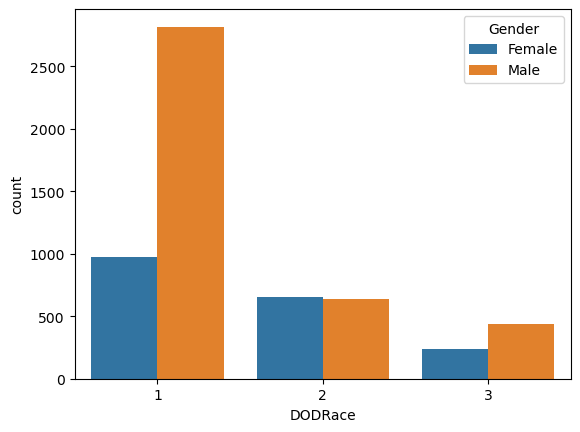

In [22]:
#checking the race of both females and males
#1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other
sns.countplot(x = 'DODRace', hue = 'Gender', data = df);

Female white women are considered as outliers because of the disparsity between their measurments and the white men measurments.

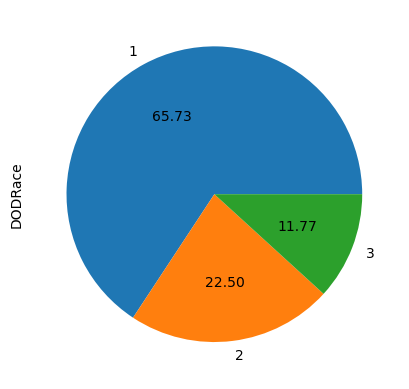

In [23]:
#visualize only the DODRace
df['DODRace'].value_counts().plot.pie(autopct = '%.2f');

Imbalanced targets

In [24]:
#check all correlations
corrs = df.corr(numeric_only=True)["DODRace"].drop("DODRace").sort_values()
corrs

sittingheight                    -0.324329
eyeheightsitting                 -0.319669
wristheight                      -0.267874
stature                          -0.232736
elbowrestheight                  -0.227899
Heightin                         -0.225612
lateralmalleolusheight           -0.218440
acromialheight                   -0.217393
cervicaleheight                  -0.215708
waistbacklength                  -0.208262
axillaheight                     -0.205576
bicristalbreadth                 -0.203874
suprasternaleheight              -0.203790
verticaltrunkcircumferenceusa    -0.196206
chestheight                      -0.193294
shoulderelbowlength              -0.179681
waistheightomphalion             -0.174910
wristcircumference               -0.174408
overheadfingertipreachsitting    -0.169650
waistfrontlengthsitting          -0.160391
handbreadth                      -0.158999
acromionradialelength            -0.158561
tenthribheight                   -0.158044
anklecircum

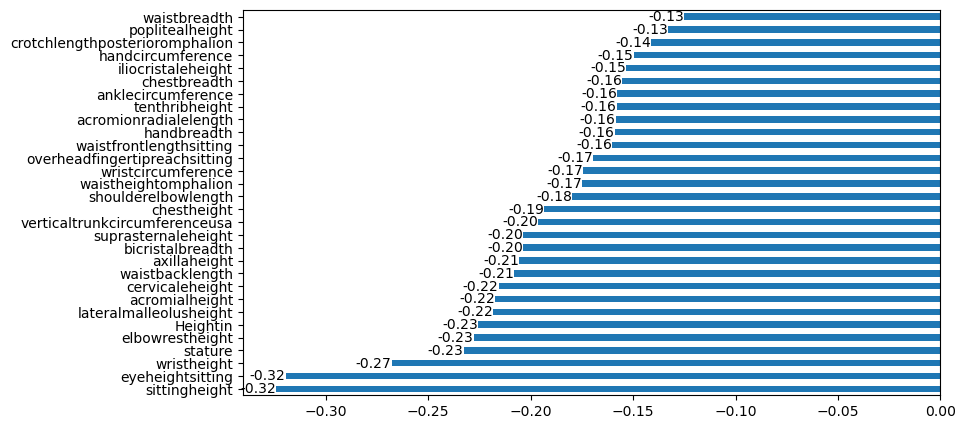

In [25]:
#make a plot showing most important 30 features
plt.figure(figsize=(9,5))
ax = df.corr(numeric_only=True)["DODRace"].drop("DODRace").sort_values()[:30].plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

Features with highest correlation are weak negative correlations.

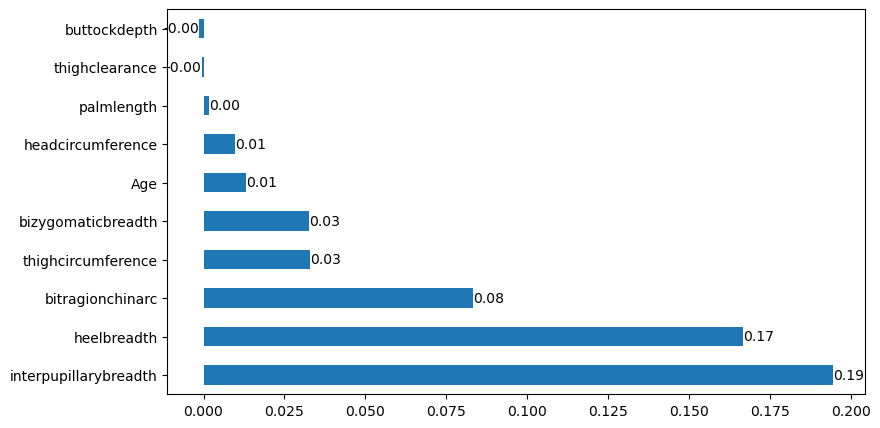

In [26]:
plt.figure(figsize=(9,5))
ax = df.corr(numeric_only=True)["DODRace"].drop("DODRace").sort_values(ascending = False)[:10].plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

Positive correlations are weaker than negative correlations.

In [27]:
                        #(rows, cols)
fig, axes = plt.subplots(24, 4, squeeze=False, figsize=(100,300))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
r = 0
c = 0
for i in df.select_dtypes(include="int").columns:
        if i != 'DODRace':
            #if you fill all rows in a column, reset r and go to the next column
            if r == 24:
                r = 0
                c+=1
                sns.barplot(data=df, x="DODRace",  y=i, estimator="mean", ax=axes[r,c]);
            sns.barplot(data=df, x="DODRace",  y=i, estimator="mean", ax=axes[r,c]);
            r+=1
#plt.show()    

In [28]:
def bar_m(model):
    sns.barplot(data = df, x= "DODRace", y = model)

interactive_df = df.columns[df.columns != 'DODRace']
interact(bar_m, model=interactive_df);

interactive(children=(Dropdown(description='model', options=('abdominalextensiondepthsitting', 'acromialheight…

The mean is balanced across races even though the races entries are not equal.

In [29]:
#(31, 3)
fig, axes = plt.subplots(24, 4, squeeze=False, figsize=(100,300))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
r = 0
c = 0
for i in df.select_dtypes(include="int").columns:
        if i != 'DODRace':
            #if you fill all rows in a column, reset r and go to the next column
            if r == 24:
                r = 0
                c+=1
                sns.boxplot(data=df, x="DODRace",  y=i, ax=axes[r,c]);
            sns.boxplot(data=df, x="DODRace",  y=i, ax=axes[r,c]);
            r+=1
#plt.show()

In [30]:
def box_m(model):
    sns.boxplot(data = df, x= "DODRace", y = model)

interactive_df = df.columns[df.columns != 'DODRace']
interact(box_m, model=interactive_df);

interactive(children=(Dropdown(description='model', options=('abdominalextensiondepthsitting', 'acromialheight…

- The outliers are realistic for the dataset
- The strongest overlap is between the black race and the hispanic race

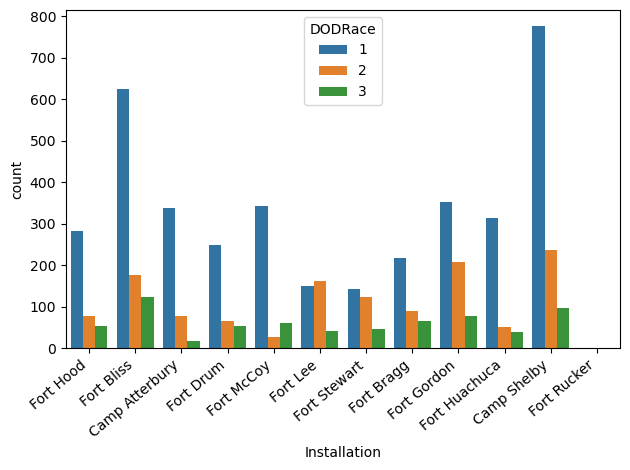

In [31]:
#sns.scatterplot(data = df, x = 'Age', y = 'stature', hue = 'DODRace')
ax = sns.countplot(x = 'Installation', hue = 'DODRace', data = df);
#rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

The black race is the majority in the Fort Lee installation site.

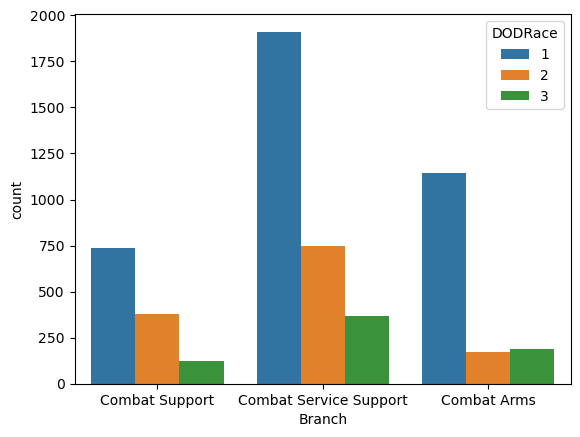

In [32]:
#branch
sns.countplot(x = 'Branch', hue = 'DODRace', data = df);

In combat arms, there are more hispanic race than black.

===============================================================================================

- Heightin – Height in Inches; self-reported, comparable to measured “stature”
- Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”


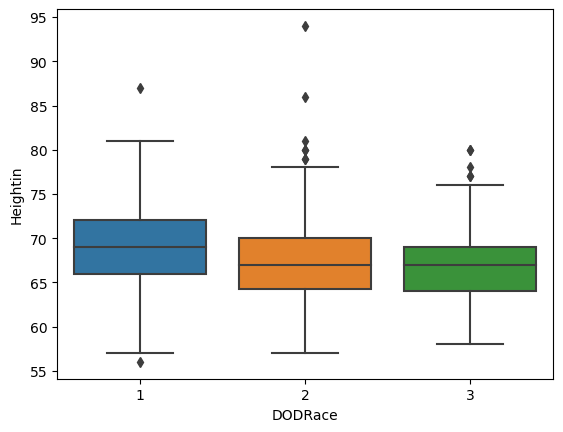

In [33]:
sns.boxplot(data=df, x="DODRace",  y="Heightin");

1 = White, 2 = Black, 3 = Hispanic

As we can see the boxplots are not far from each other but the black race has the highest outlier

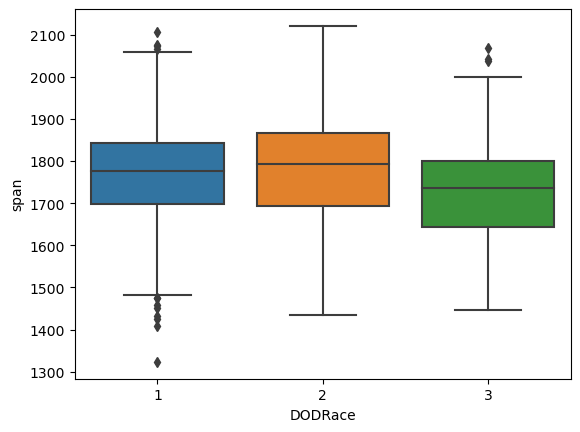

In [34]:
#span can be used to measure height
sns.boxplot(data=df, x="DODRace",  y="span");

Span's outliers are closer to each other.

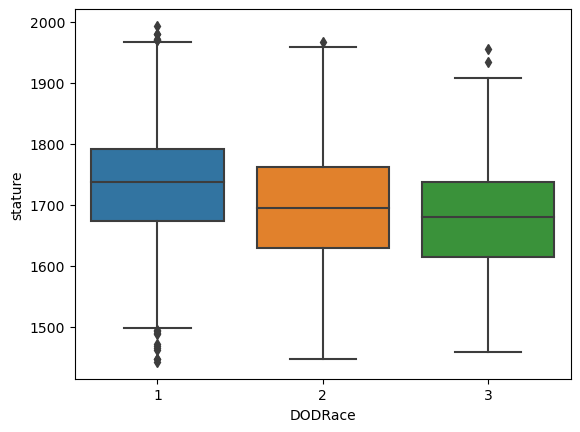

In [35]:
#checking "stature" which is the same as 'Heightin' but with different measure
sns.boxplot(data=df, x="DODRace",  y="stature");

since stature has the densiest outliers, we will keep it and drop 'Heightin' and 'span'.

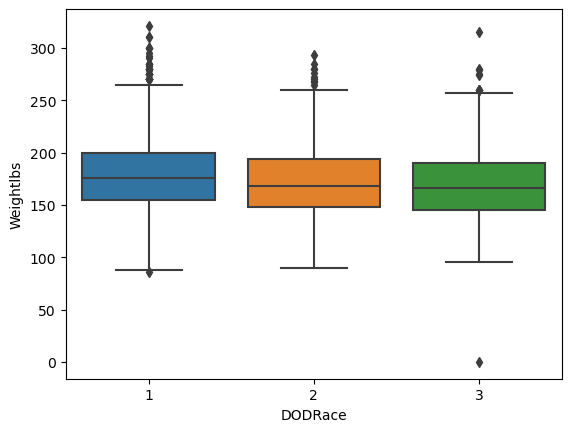

In [36]:
sns.boxplot(data=df, x="DODRace",  y="Weightlbs");

No one can have a weight of zero. It will be dropped.

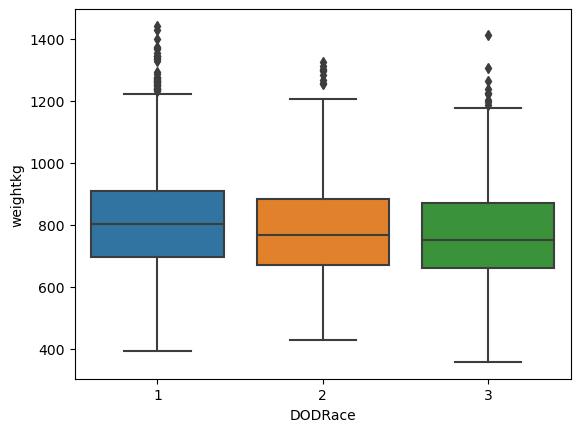

In [37]:
sns.boxplot(data=df, x="DODRace",  y="weightkg");

'WeightKg' – Weight (in kg*10).

In [38]:
#dropping self reported/ repeated measurements
df.drop(columns = ['Weightlbs', 'Heightin', 'span'], inplace = True)

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 101 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    abdominalextensiondepthsitting  5769 non-null   int64 
 1    acromialheight                  5769 non-null   int64 
 2    acromionradialelength           5769 non-null   int64 
 3    anklecircumference              5769 non-null   int64 
 4    axillaheight                    5769 non-null   int64 
 5    balloffootcircumference         5769 non-null   int64 
 6    balloffootlength                5769 non-null   int64 
 7    biacromialbreadth               5769 non-null   int64 
 8    bicepscircumferenceflexed       5769 non-null   int64 
 9    bicristalbreadth                5769 non-null   int64 
 10   bideltoidbreadth                5769 non-null   int64 
 11   bimalleolarbreadth              5769 non-null   int64 
 12   bitragionchinarc                

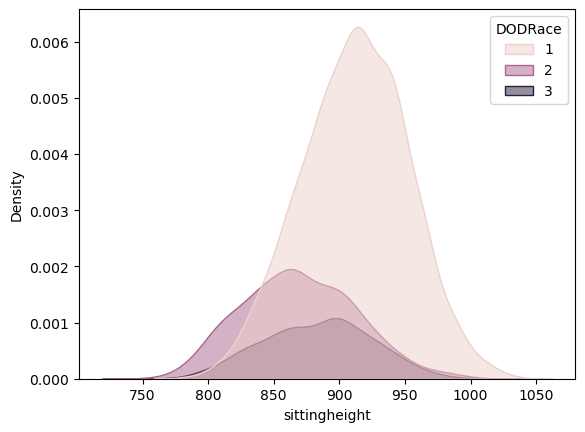

In [39]:
#see the overlap of target classes with their strongest negative correlation
sns.kdeplot(data=df,x = 'sittingheight',  hue = 'DODRace', fill = True, alpha = 0.5);

There is overlap in the strongest negative correlation.

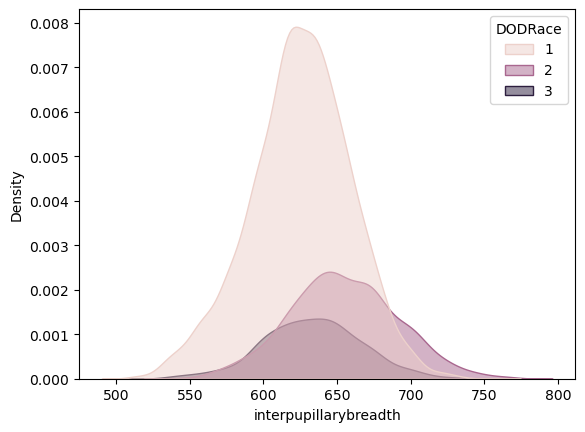

In [40]:
#see the overlap of target classes with their strongest positive correlation
sns.kdeplot(data=df,x = 'interpupillarybreadth',  hue = 'DODRace', fill = True, alpha = 0.5);

There is overlap in the strongest positive correlation.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [41]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("\tTest_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print(classification_report(y_test, y_pred))
    print()
    print("\tTrain_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_train_pred), show_normed = True, figsize=(6, 6))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print()
    print(classification_report(y_train, y_train_pred))

In [42]:
qt = QuantileTransformer()

X = df.drop(columns = ['DODRace'])
y = df['DODRace']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9,
                                                    stratify = y)

In [45]:
#dummy classifier
dummy_steps = [('transformer', cols_transformer), ("scaler", qt),
               ("dummy", DummyClassifier(strategy="stratified"))]

dummy_model = Pipeline(steps=dummy_steps)

dummy_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', QuantileTransformer()),
                ('dummy', DummyClassifier(strategy='stratified'))])

	Test_Set



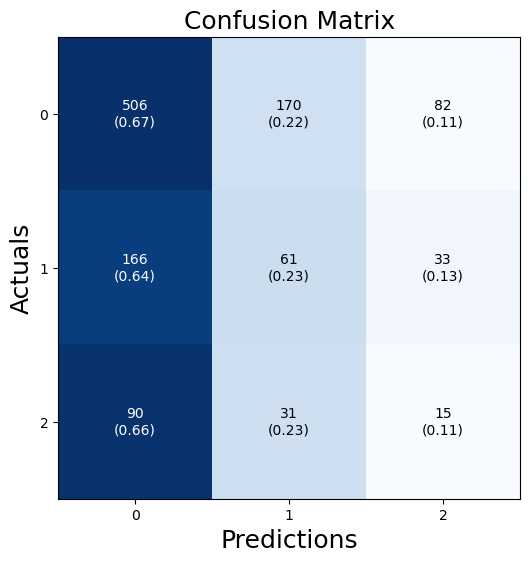

              precision    recall  f1-score   support

           1       0.66      0.67      0.67       758
           2       0.23      0.23      0.23       260
           3       0.12      0.11      0.11       136

    accuracy                           0.50      1154
   macro avg       0.34      0.34      0.34      1154
weighted avg       0.50      0.50      0.50      1154


	Train_Set



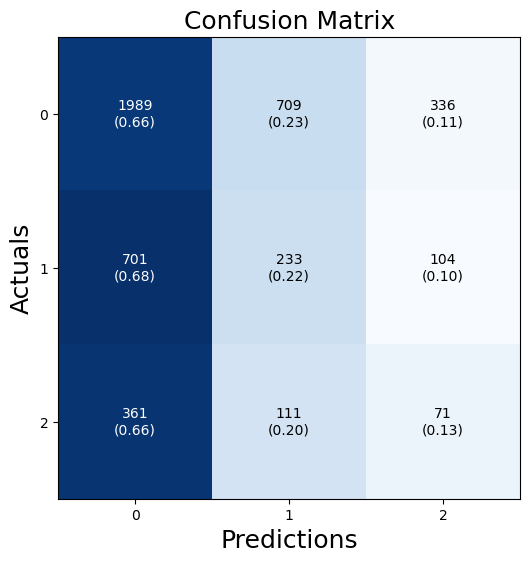


              precision    recall  f1-score   support

           1       0.65      0.66      0.65      3034
           2       0.22      0.22      0.22      1038
           3       0.14      0.13      0.13       543

    accuracy                           0.50      4615
   macro avg       0.34      0.34      0.34      4615
weighted avg       0.49      0.50      0.50      4615



In [46]:
eval_metric(dummy_model, X_train, y_train, X_test, y_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [47]:
steps = [('transformer', cols_trans), ("scaler", qt), ("logistic", LogisticRegression())]

logistic_model = Pipeline(steps=steps)

logistic_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', QuantileTransformer()),
                ('logistic', LogisticRegression())])

	Test_Set



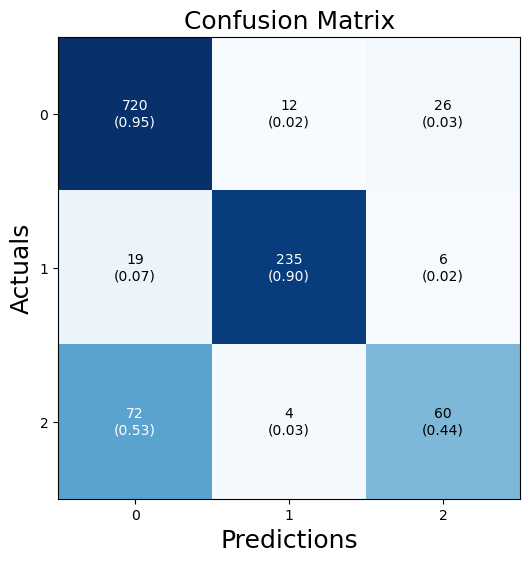

              precision    recall  f1-score   support

           1       0.89      0.95      0.92       758
           2       0.94      0.90      0.92       260
           3       0.65      0.44      0.53       136

    accuracy                           0.88      1154
   macro avg       0.83      0.76      0.79      1154
weighted avg       0.87      0.88      0.87      1154


	Train_Set



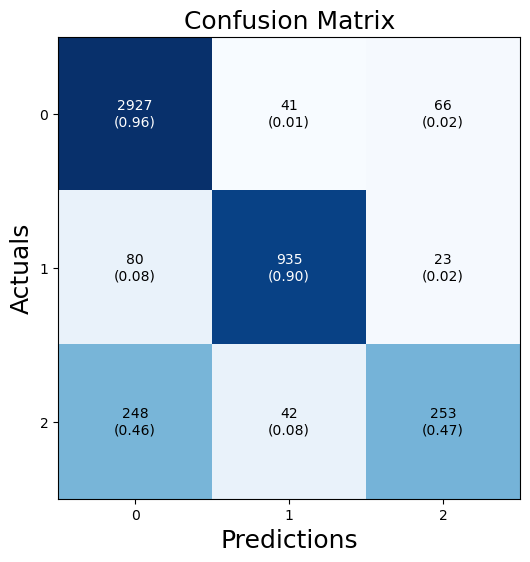


              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.92      0.90      0.91      1038
           3       0.74      0.47      0.57       543

    accuracy                           0.89      4615
   macro avg       0.85      0.78      0.80      4615
weighted avg       0.88      0.89      0.88      4615



In [48]:
eval_metric(logistic_model, X_train, y_train, X_test, y_test)

White and black races are predicted good but the model performs poorly on hispanic race.

### Logistic Model GridsearchCV

In [49]:
f1_hispanic = make_scorer(f1_score, labels = [3],  pos_label =1, average=None)
precision_hispanic = make_scorer(precision_score, labels = [3], pos_label =1, average=None)
recall_hispanic = make_scorer(recall_score, labels = [3], pos_label =1, average=None)

scoring_hispanic = {"precision_hispanic":precision_hispanic, "recall_hispanic":recall_hispanic,
           "f1_hispanic":f1_hispanic}

In [51]:
cv = StratifiedKFold(n_splits=10) # In each iteration, divides labels according to their ratio in train and in test sets

hispanic_pipe = Pipeline(steps = steps)
scores_h = cross_validate(hispanic_pipe, X_train, y_train,
                        scoring=scoring_hispanic,  
                        cv=cv,
                        return_train_score=True)
df_scores = pd.DataFrame(scores_h, index = range(1,11))
df_scores


fit_time  score_time  test_precision_hispanic  train_precision_hispanic  \
1   0.473733    0.044878                 0.515152                  0.793443   
2   0.470741    0.043883                 0.714286                  0.744898   
3   0.486717    0.039892                 0.750000                  0.728814   
4   0.489203    0.045877                 0.651163                  0.745704   
5   0.497090    0.044881                 0.727273                  0.753378   
6   0.476335    0.046869                 0.666667                  0.756667   
7   0.480450    0.046874                 0.655172                  0.740385   
8   0.479785    0.038429                 0.666667                  0.744027   
9   0.502169    0.042881                 0.680000                  0.746875   
10  0.497671    0.045876                 0.787879                  0.750000   

    test_recall_hispanic  train_recall_hispanic  test_f1_hispanic  \
1               0.314815               0.494888          0.390805   
2               0.462963               0.447853          0.561798   
3               0.490909               0.440574          0.593407   
4               0.509091               0.444672          0.571429   
5               0.436364               0.456967          0.545455   
6               0.370370               0.464213          0.476190   
7               0.351852               0.472393          0.457831   
8               0.407407               0.445808          0.505747   
9               0.314815               0.488753          0.430380   
10              0.481481               0.460123          0.597701   

    train_f1_hispanic  
1            0.609572  
2            0.559387  
3            0.549170  
4            0.557125  
5            0.568878  
6            0.575412  
7            0.576779  
8            0.557545  
9            0.590853  
10           0.570342

No good recall for hispanic class.

In [52]:
#do gridsearchCV for recall hispanic class
logistic_pipe_gs_h = Pipeline(steps = steps)

parameters_lr_h = [{'logistic__penalty':['l2', 'l1'],'logistic__C': [10, 11, 12, 13, 14, 15, 16],
                    'logistic__class_weight':['auto', 'balanced', {1:.1, 2:.1, 3:.8}],
                    'logistic__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

grid_search_lr_h = GridSearchCV(estimator = logistic_pipe_gs_h, param_grid = parameters_lr_h,
                              scoring = f1_hispanic, cv = cv, n_jobs = -1)

grid_search_lr_h.fit(X_train, y_train)
best_accuracy_lr_h = grid_search_lr_h.best_score_
best_paramaeter_lr_h = grid_search_lr_h.best_params_  
print("Best hispanic f1-score of LR: {:.2f} %".format(best_accuracy_lr_h.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr_h) 
#Best Accuracy of LR: 53.71 %
#Best Parameter of LR: {'logistic__C': 11, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}

Best hispanic f1-score of LR: 56.69 %
Best Parameter of LR: {'logistic__C': 13, 'logistic__class_weight': 'balanced', 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear'}


In [54]:
steps_lr_h_op = [('transformer', cols_trans), ("scaler", qt),
                     ("logistic", LogisticRegression(C = 13, penalty = 'l2', class_weight = 'balanced', solver = 'liblinear'))]
pipe_lr_h_op = Pipeline(steps = steps_lr_h_op)
pipe_lr_h_op.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', QuantileTransformer()),
                ('logistic',
                 LogisticRegression(C=13, class_weight='balanced',
                                    solver='liblinear'))])

	Test_Set



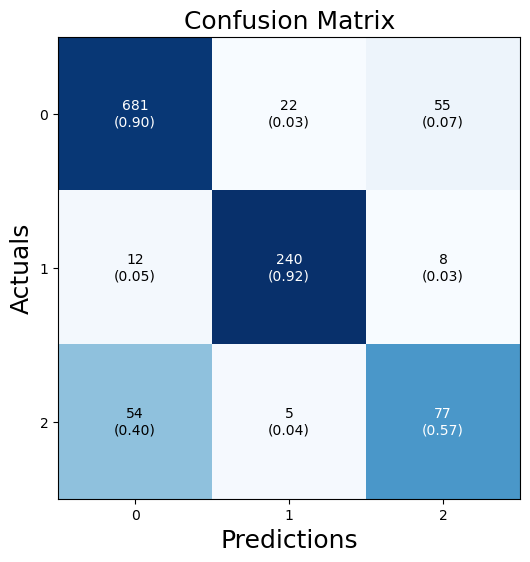

              precision    recall  f1-score   support

           1       0.91      0.90      0.90       758
           2       0.90      0.92      0.91       260
           3       0.55      0.57      0.56       136

    accuracy                           0.86      1154
   macro avg       0.79      0.80      0.79      1154
weighted avg       0.87      0.86      0.87      1154


	Train_Set



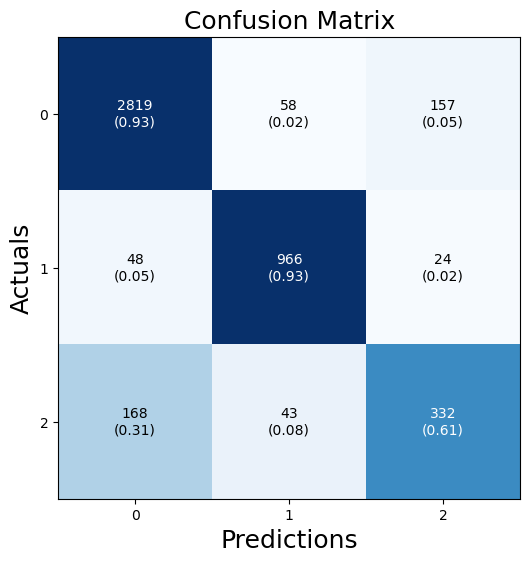


              precision    recall  f1-score   support

           1       0.93      0.93      0.93      3034
           2       0.91      0.93      0.92      1038
           3       0.65      0.61      0.63       543

    accuracy                           0.89      4615
   macro avg       0.83      0.82      0.83      4615
weighted avg       0.89      0.89      0.89      4615



In [55]:
eval_metric(pipe_lr_h_op, X_train, y_train, X_test, y_test)

### Checking the most impactful features for each race

In [56]:
#show the most effective features
df_feat_imp =pd.DataFrame(data=(pipe_lr_h_op.named_steps.logistic.coef_).T,
                         index=pipe_lr_h_op.named_steps.transformer.get_feature_names_out(),
                         columns=['White', 'Black', 'Hispanic']).sort_values("Hispanic")

In [57]:
df_feat_imp

White     Black  Hispanic
SubjectsBirthLocation_5                        1.467458  1.807289 -3.069634
sittingheight                                  3.703135 -4.059457 -2.599549
axillaheight                                  -0.889815  2.635761 -2.477402
buttockkneelength                              0.677656  2.515372 -2.387501
SubjectsBirthLocation_0                        0.818520  1.187581 -2.236989
forearmhandlength                              0.497652  1.646193 -2.138109
weightkg                                       2.200143 -1.658825 -2.073472
crotchheight                                  -0.222657  3.062765 -1.910562
stature                                        4.603971 -6.622210 -1.857440
buttockcircumference                          -0.502547  2.501080 -1.809748
wristcircumference                             2.150455 -1.190604 -1.681607
iliocristaleheight                             3.368169 -4.592959 -1.647233
headlength                                     2.445833 -0.940171 -1.518563
balloffootcircumference                        1.455666 -0.837265 -1.489583
wristheight                                    1.100632  0.550513 -1.488937
waistheightomphalion                           1.693494 -0.710202 -1.478583
handcircumference                              1.889618 -0.874094 -1.450495
interscyei                                     0.221083  2.091380 -1.270755
anklecircumference                             2.140600 -1.739209 -1.253142
SubjectsBirthLocation_6                        1.116721  0.572453 -1.239146
forearmcircumferenceflexed                    -0.354789  2.843902 -1.166906
shoulderelbowlength                            2.220642 -4.037834 -1.097055
Age                                           -0.455972  1.638878 -1.054400
calfcircumference                              2.084199 -1.993103 -0.993562
waistbacklength                                1.350660 -0.386839 -0.950634
Installation_Camp Atterbury                    0.327499  0.936408 -0.932905
forearmforearmbreadth                          1.941008 -1.753563 -0.867574
abdominalextensiondepthsitting                 1.583259 -0.889444 -0.752442
biacromialbreadth                             -0.496050  3.287979 -0.748210
Installation_Fort Gordon                       0.053089  0.475503 -0.695503
Gender_Male                                    1.498720 -3.347525 -0.681642
handbreadth                                    0.989327 -0.799835 -0.641804
headcircumference                             -1.642233  3.009355 -0.636979
kneeheightsitting                              0.864518 -1.627726 -0.610935
chestbreadth                                   1.342982 -1.386639 -0.607526
Installation_Fort Rucker                       0.099975 -0.010622 -0.564595
WritingPreference_Either hand (No preference)  1.051579 -1.476724 -0.564350
shoulderlength                                 0.111985  0.679608 -0.528009
neckcircumference                              1.208529 -0.426784 -0.503490
handlength                                    -0.963600  2.823393 -0.497387
thighcircumference                            -3.225323  5.990417 -0.461358
waistdepth                                    -2.570764  2.720048 -0.458324
Component_Regular Army                         0.173789 -0.381199 -0.456184
buttockheight                                 -0.650049  1.095504 -0.379967
Branch_Combat Support                          0.117342 -0.487628 -0.338888
thumbtipreach                                 -0.224918  0.472161 -0.337151
Installation_Camp Shelby                       0.381766 -0.492400 -0.334589
PrimaryMOS_2                                   0.179852  0.024204 -0.244116
verticaltrunkcircumferenceusa                  0.438696 -0.551583 -0.229765
PrimaryMOS_3                                   0.267772 -0.376297 -0.216637
acromionradialelength                         -0.355823  0.838899 -0.214555
bicristalbreadth                               1.472891 -2.313397 -0.212249
PrimaryMOS_1          

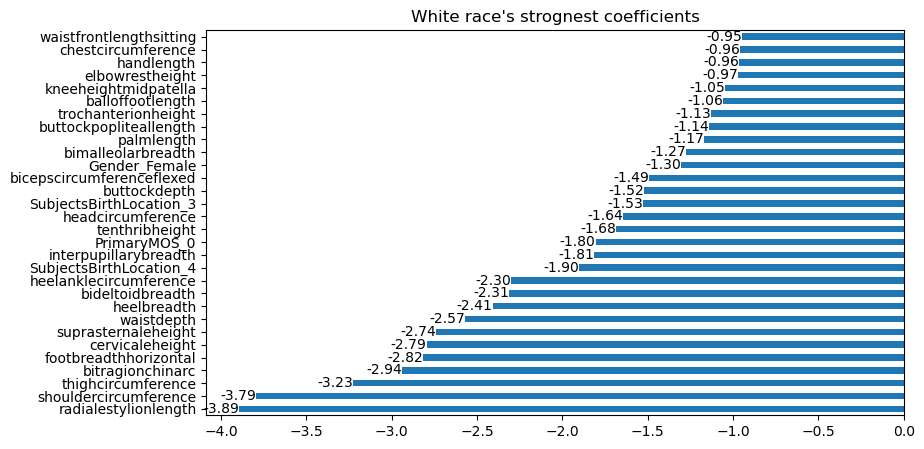

In [58]:
#visualizing white coefficients
plt.figure(figsize=(9,5))
ax = df_feat_imp["White"].sort_values()[:30].plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_title("White race's strognest coefficients");

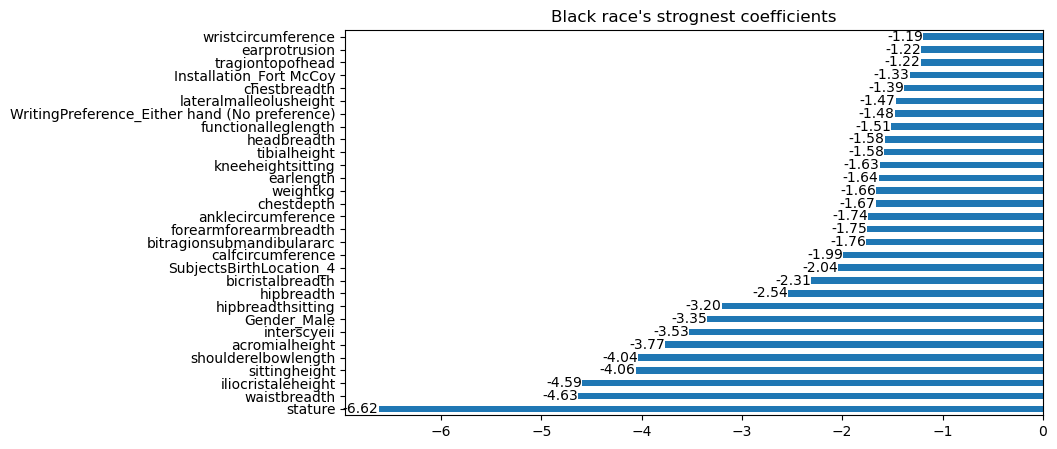

In [59]:
#visualizing black coefficients
plt.figure(figsize=(9,5))
ax = df_feat_imp["Black"].sort_values()[:30].plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_title("Black race's strognest coefficients");

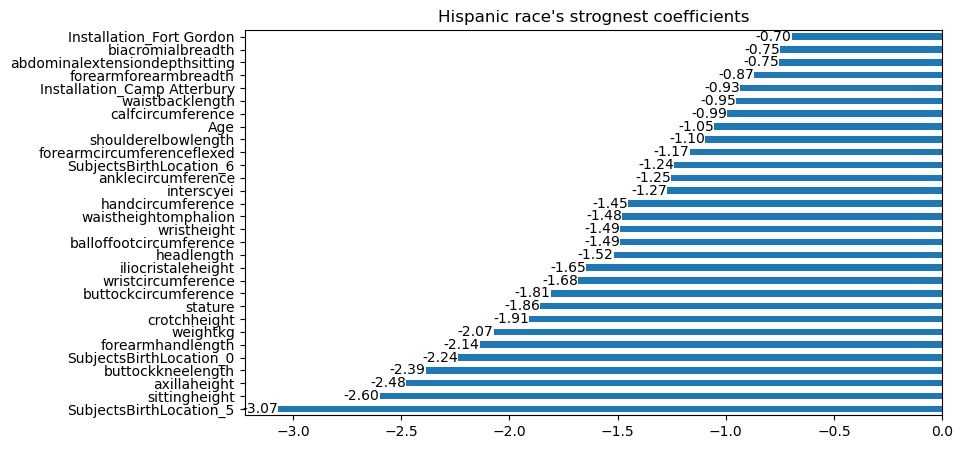

In [60]:
#visualizing hispanic coefficients
plt.figure(figsize=(9,5))
ax = df_feat_imp["Hispanic"].sort_values()[:30].plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_title("Hispanic race's strognest coefficients");
#use lasso (l1) for feature selection NOT RIDGE (L2)!!

## 2. SVC

### Vanilla SVC model 

In [61]:
steps_svc = [('transformer', cols_trans), ("scaler", qt), ("svc", SVC())]

pipe_svc = Pipeline(steps = steps_svc)
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', QuantileTransformer()), ('svc', SVC())])

	Test_Set



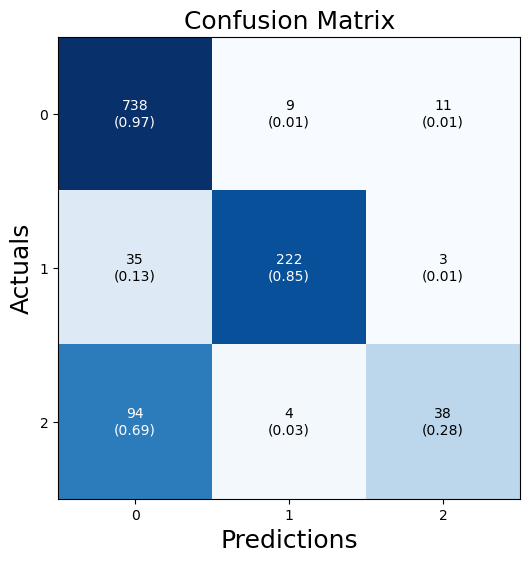

              precision    recall  f1-score   support

           1       0.85      0.97      0.91       758
           2       0.94      0.85      0.90       260
           3       0.73      0.28      0.40       136

    accuracy                           0.86      1154
   macro avg       0.84      0.70      0.74      1154
weighted avg       0.86      0.86      0.85      1154


	Train_Set



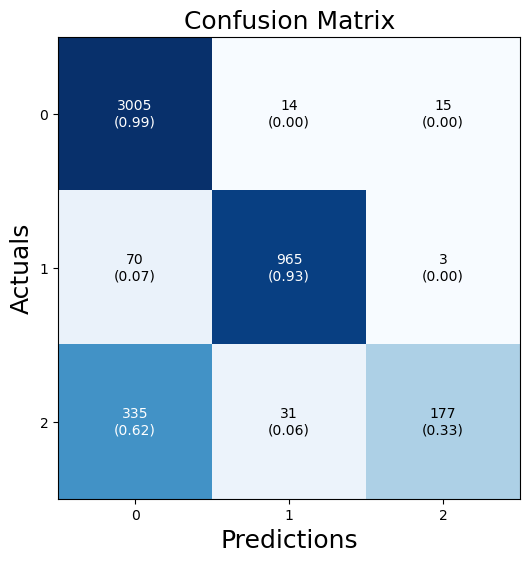


              precision    recall  f1-score   support

           1       0.88      0.99      0.93      3034
           2       0.96      0.93      0.94      1038
           3       0.91      0.33      0.48       543

    accuracy                           0.90      4615
   macro avg       0.91      0.75      0.78      4615
weighted avg       0.90      0.90      0.88      4615



In [62]:
eval_metric(pipe_svc, X_train, y_train, X_test, y_test)

###  SVC Model GridsearchCV

In [64]:
#random gridsearch
pipe_svc_gs = Pipeline(steps = steps_svc)

parameters_svc = {'svc__C':[0.01,0.1,1,10,1000],
              'svc__kernel':['linear','rbf','sigmoid','poly'],
              'svc__gamma':["scale", "auto"],
              'svc__degree':[2,3]}

grid_search_svc = GridSearchCV(estimator = pipe_svc_gs, param_grid = parameters_svc,
                               #here I put the make_scorer I made for hispanic
                               scoring = f1_hispanic, cv = 10, n_jobs = -1)

grid_search_svc.fit(X_train, y_train)
best_accuracy_svc = grid_search_svc.best_score_
best_paramaeter_svc = grid_search_svc.best_params_  
print("Best f1_hispanic score of SVC: {:.2f} %".format(best_accuracy_svc.mean()*100))
print("Best Parameter of SVC:", best_paramaeter_svc) 

Best f1_hispanic score of SVC: 51.93 %
Best Parameter of SVC: {'svc__C': 10, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}


	Test_Set



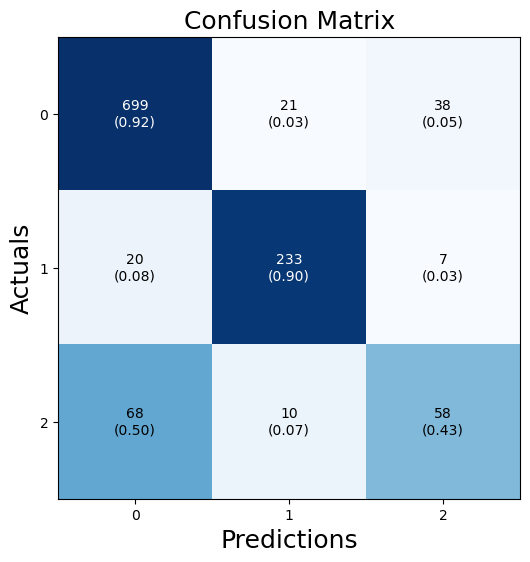

              precision    recall  f1-score   support

           1       0.89      0.92      0.90       758
           2       0.88      0.90      0.89       260
           3       0.56      0.43      0.49       136

    accuracy                           0.86      1154
   macro avg       0.78      0.75      0.76      1154
weighted avg       0.85      0.86      0.85      1154


	Train_Set



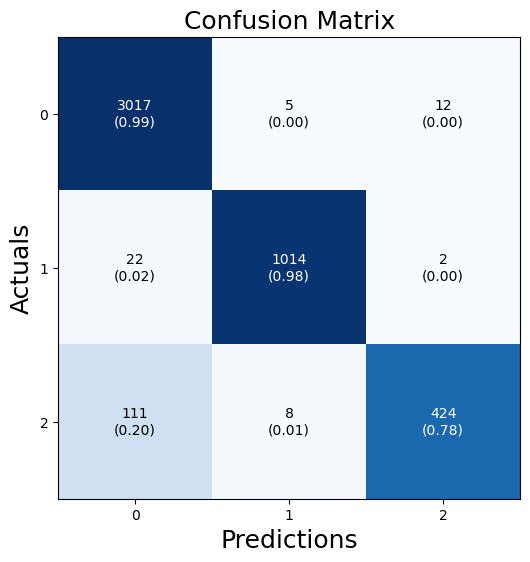


              precision    recall  f1-score   support

           1       0.96      0.99      0.98      3034
           2       0.99      0.98      0.98      1038
           3       0.97      0.78      0.86       543

    accuracy                           0.97      4615
   macro avg       0.97      0.92      0.94      4615
weighted avg       0.97      0.97      0.96      4615



In [65]:
eval_metric(grid_search_svc, X_train, y_train, X_test, y_test)

SVC is clearly overfitting.

## 3. RF

### Vanilla RF Model

In [66]:
#making an ordinal column transformer for tree based models
enc_ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
cols_ordinal = ['Gender', 'Installation', 'Component', 'Branch', 'WritingPreference',
               'PrimaryMOS', 'SubjectsBirthLocation']


cols_trans_ord = make_column_transformer((enc_ord, cols_ordinal),
                                     remainder='passthrough', verbose_feature_names_out=False)
cols_transformer_ord = cols_trans_ord.set_output(transform="pandas")

In [67]:
steps_rf = [("OrdinalEncoder", cols_trans_ord),
              ("RF_model", RandomForestClassifier(random_state=101))]

pipe_rf = Pipeline(steps=steps_rf)

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference',
                                                   'PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

	Test_Set



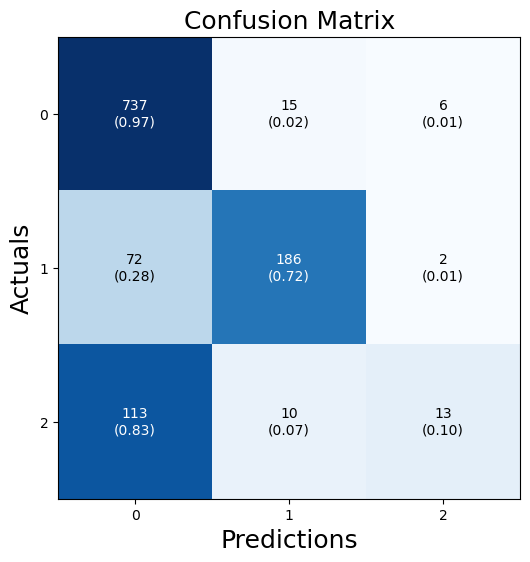

              precision    recall  f1-score   support

           1       0.80      0.97      0.88       758
           2       0.88      0.72      0.79       260
           3       0.62      0.10      0.17       136

    accuracy                           0.81      1154
   macro avg       0.77      0.59      0.61      1154
weighted avg       0.80      0.81      0.77      1154


	Train_Set



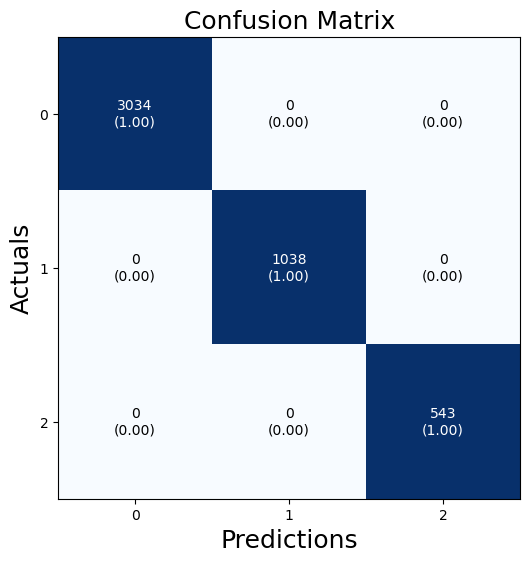


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [68]:
eval_metric(pipe_rf, X_train, y_train, X_test, y_test)

### RF Model GridsearchCV

In [69]:
steps_rf = [("OrdinalEncoder", cols_trans_ord),
              ("RF_model", RandomForestClassifier(random_state=101))]
pipe_rf_gs = Pipeline(steps=steps_rf)

parameters_rf = {'RF_model__n_estimators':[64, 128, 200],
              'RF_model__max_features':[2, 4, 'sqrt'],
              'RF_model__max_depth':[2, 3, 4],
              'RF_model__min_samples_split':[2, 3, 4],
              'RF_model__min_samples_leaf': [2,3,4],
              'RF_model__max_samples':[0.8, 1]}

grid_search_rf = GridSearchCV(estimator = pipe_rf_gs, param_grid = parameters_rf,
                               #here I put the make_scorer I made for hispanic
                               scoring = f1_hispanic, cv = cv, n_jobs = -1)

grid_search_rf.fit(X_train, y_train)
best_accuracy_rf = grid_search_rf.best_score_
best_paramaeter_rf = grid_search_rf.best_params_  
print("Best score of random forest: {:.2f} %".format(best_accuracy_rf.mean()*100))
print("Best Parameter of random forest:", best_paramaeter_rf) 

Best score of random forest: 0.00 %
Best Parameter of random forest: {'RF_model__max_depth': 2, 'RF_model__max_features': 2, 'RF_model__max_samples': 0.8, 'RF_model__min_samples_leaf': 2, 'RF_model__min_samples_split': 2, 'RF_model__n_estimators': 64}


	Test_Set



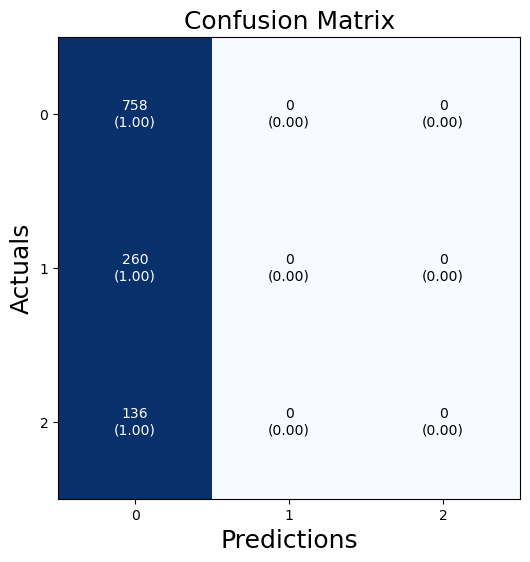

              precision    recall  f1-score   support

           1       0.66      1.00      0.79       758
           2       0.00      0.00      0.00       260
           3       0.00      0.00      0.00       136

    accuracy                           0.66      1154
   macro avg       0.22      0.33      0.26      1154
weighted avg       0.43      0.66      0.52      1154


	Train_Set



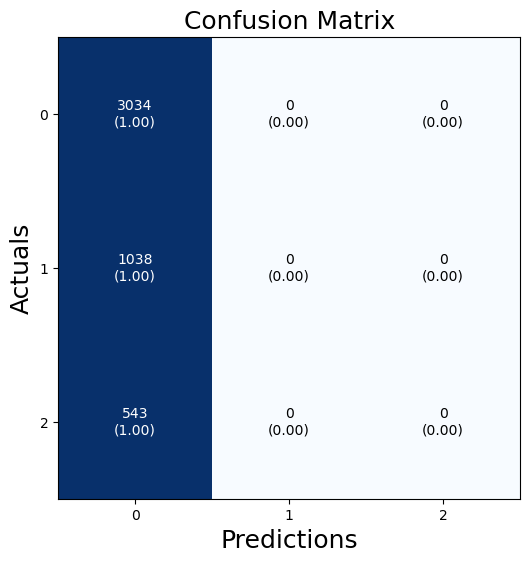


              precision    recall  f1-score   support

           1       0.66      1.00      0.79      3034
           2       0.00      0.00      0.00      1038
           3       0.00      0.00      0.00       543

    accuracy                           0.66      4615
   macro avg       0.22      0.33      0.26      4615
weighted avg       0.43      0.66      0.52      4615



In [70]:
eval_metric(grid_search_rf, X_train, y_train, X_test, y_test)

The worst performing model.

## 4. XGBoost

### Vanilla XGBoost Model

In [71]:
steps_xg = [("OrdinalEncoder", cols_trans_ord), ("xgboost", xgb.XGBClassifier(random_state=42))]

pipe_xg = Pipeline(steps=steps_xg)
#xgboost needs to be encoded like [0, 1, 2, ...]
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
pipe_xg.fit(X_train, y_train_le)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference',
                                                   'PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_scor...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

	Test_Set



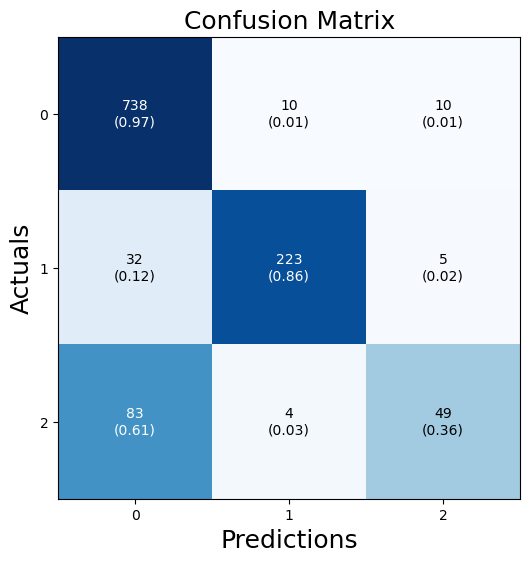

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       758
           1       0.94      0.86      0.90       260
           2       0.77      0.36      0.49       136

    accuracy                           0.88      1154
   macro avg       0.86      0.73      0.77      1154
weighted avg       0.87      0.88      0.86      1154


	Train_Set



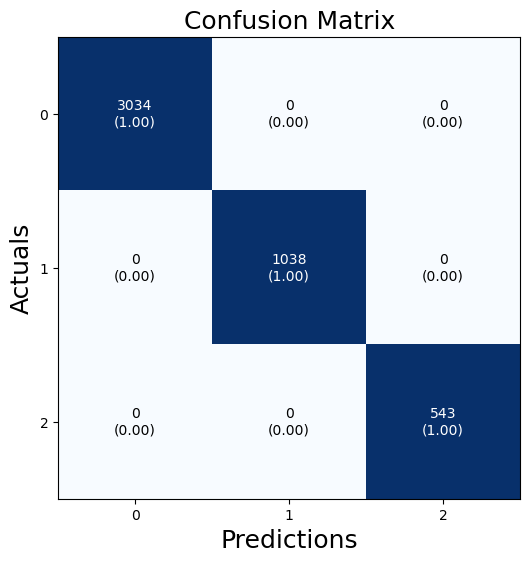


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [72]:
eval_metric(pipe_xg, X_train, y_train_le, X_test, y_test_le)

In [73]:
#changing the labels for xgboost since we encoded y
f1_hispanic_xg = make_scorer(f1_score, labels = [2],  pos_label =1, average=None)
precision_hispanic_xg = make_scorer(precision_score, labels = [2], pos_label =1, average=None)
recall_hispanic_xg = make_scorer(recall_score, labels = [2], pos_label =1, average=None)

scoring_hispanic_xg = {"precision_hispanic_xg":precision_hispanic_xg, "recall_hispanic_xg":recall_hispanic_xg,
           "f1_hispanic_xg":f1_hispanic_xg}

In [74]:
#cross validation for hispanic recall
#cv = StratifiedKFold(n_splits=10) # In each iteration, divides labels according to their ratio in train and in test sets
pipe_xg_h = Pipeline(steps = steps_xg)
scores_xg_h = cross_validate(pipe_xg_h,
                        X_train,
                        y_train_le,
                        scoring = scoring_hispanic_xg,
                        cv = cv,
                        return_train_score=True)
df_scores_xg_h = pd.DataFrame(scores_xg_h, index = range(1, 11))
#df_scores_xg_h.mean()[2:]

#hispanic_pipe = Pipeline(steps = logistic_steps_op)
#scores_h = cross_validate(hispanic_pipe, X_train, y_train_le,
#                        scoring=scoring_hispanic,  # maximize scores of class 1.
#                        cv=cv,
#                        return_train_score=True)
#df_scores_xg_h = pd.DataFrame(scores_h, index = range(1,11))
df_scores_xg_h

fit_time  score_time  test_precision_hispanic_xg  \
1   2.149253    0.022938                    0.642857   
2   2.031567    0.021974                    0.851852   
3   2.040514    0.026929                    0.814815   
4   2.052511    0.016956                    0.500000   
5   2.051515    0.021941                    0.821429   
6   2.034559    0.022940                    0.642857   
7   2.167204    0.019948                    0.692308   
8   2.349717    0.030917                    0.875000   
9   2.160224    0.028948                    0.700000   
10  2.068466    0.027927                    0.846154   

    train_precision_hispanic_xg  test_recall_hispanic_xg  \
1                           1.0                 0.333333   
2                           1.0                 0.425926   
3                           1.0                 0.400000   
4                           1.0                 0.309091   
5                           1.0                 0.418182   
6                           1.0                 0.333333   
7                           1.0                 0.333333   
8                           1.0                 0.388889   
9                           1.0                 0.259259   
10                          1.0                 0.407407   

    train_recall_hispanic_xg  test_f1_hispanic_xg  train_f1_hispanic_xg  
1                        1.0             0.439024                   1.0  
2                        1.0             0.567901                   1.0  
3                        1.0             0.536585                   1.0  
4                        1.0             0.382022                   1.0  
5                        1.0             0.554217                   1.0  
6                        1.0             0.439024                   1.0  
7                        1.0             0.450000                   1.0  
8                        1.0             0.538462                   1.0  
9                        1.0             0.378378                   1.0  
10                       1.0             0.550000                   1.0

The highest precision is 87 while the highest recall is 42 in hispanic class.

### XGBoost Model GridsearchCV

In [75]:
parameters_xgb = {"xgboost__n_estimators":[50, 100, 200],
              'xgboost__max_depth':[3,4,5],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1]}

xgb_pipe_op = Pipeline(steps = steps_xg) 
xgb_grid = GridSearchCV(xgb_pipe_op, parameters_xgb, scoring=f1_hispanic_xg, n_jobs=-1,
                        return_train_score=True)

xgb_grid.fit(X_train, y_train_le)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Installation',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference',
                                                                          'PrimaryMOS',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgboost',...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=-1,
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4, 5],
                         'xgboost__n_estimators': [50, 100, 200],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(f1_score, labels=[2], pos_label=1, average=None))

	Test_Set



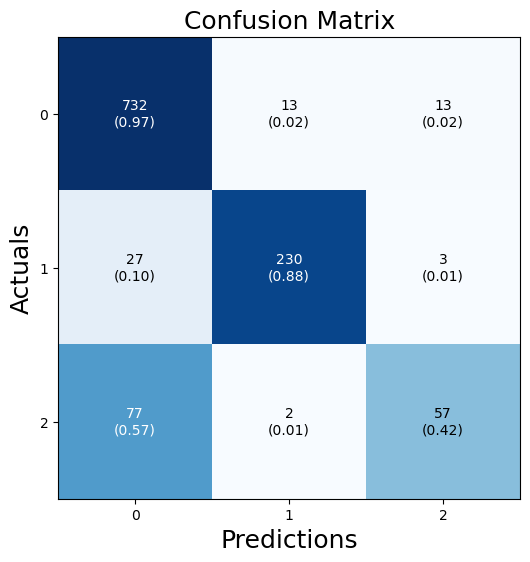

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       758
           1       0.94      0.88      0.91       260
           2       0.78      0.42      0.55       136

    accuracy                           0.88      1154
   macro avg       0.87      0.76      0.79      1154
weighted avg       0.88      0.88      0.87      1154


	Train_Set



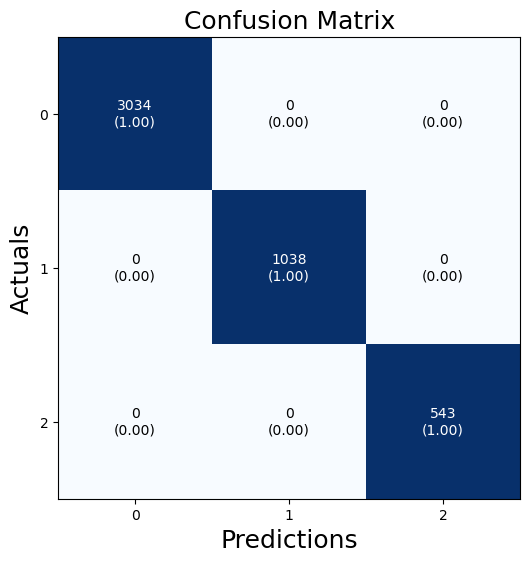


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [76]:
eval_metric(xgb_grid, X_train, y_train_le, X_test, y_test_le)

In [133]:
#checking the best parameters
xgb_grid.best_params_

{'xgboost__colsample_bytree': 1,
 'xgboost__learning_rate': 0.2,
 'xgboost__max_depth': 4,
 'xgboost__n_estimators': 200,
 'xgboost__subsample': 0.8}

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

## Logistic Regression Over/ Under Sampling

In [77]:
#default sampling strategy 'auto' -> resample all but majority class
over = SMOTE(sampling_strategy={2:3034, 3: 3034}, random_state = 101)
#under = RandomUnderSampler(sampling_strategy = {1: 1034}, random_state = 101)

In [78]:
#xgboost ovrsampler
over_xg = SMOTE(sampling_strategy={1:3034, 2: 3034}, random_state = 101)

In [79]:
steps_os = [('transformer', cols_transformer), ('over', over), ('scaler', qt),
            ('logistic', LogisticRegression(C = 13, penalty = 'l2', class_weight = 'balanced', solver = 'liblinear'))]
pipe_os_lr = Pipeline(steps=steps_os)
pipe_os_lr.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('over',
                 SMOTE(random_state=101, sampling_strategy={2: 3034, 3: 3034})),
                ('scaler', QuantileTransformer()),
                ('logistic',
                 LogisticRegression(C=13, class_weight='balanced',
                                    solver='liblinear'))])

	Test_Set



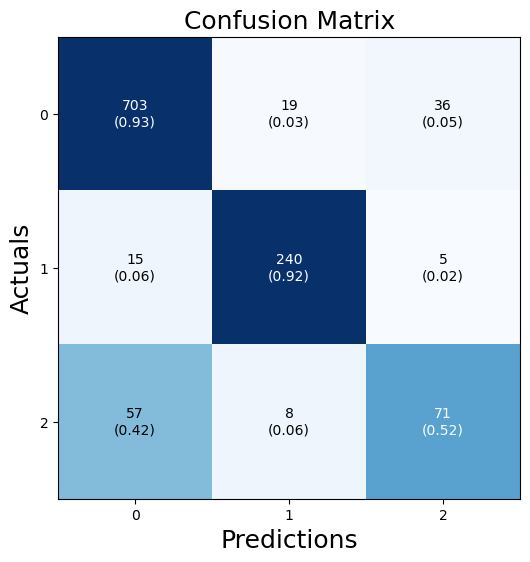

              precision    recall  f1-score   support

           1       0.91      0.93      0.92       758
           2       0.90      0.92      0.91       260
           3       0.63      0.52      0.57       136

    accuracy                           0.88      1154
   macro avg       0.81      0.79      0.80      1154
weighted avg       0.87      0.88      0.88      1154


	Train_Set



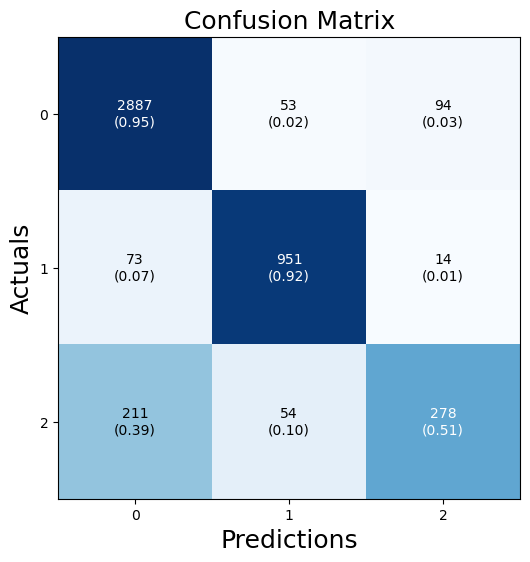


              precision    recall  f1-score   support

           1       0.91      0.95      0.93      3034
           2       0.90      0.92      0.91      1038
           3       0.72      0.51      0.60       543

    accuracy                           0.89      4615
   macro avg       0.84      0.79      0.81      4615
weighted avg       0.89      0.89      0.89      4615



In [80]:
eval_metric(pipe_os_lr, X_train, y_train, X_test, y_test)

Logistic regression performs better after oversampling.

### Oversampling SVC

In [81]:
steps_svc_op_os = [('transformer', cols_transformer), ('over', over), ("scaler", qt), 
               ('svc', SVC(C = 10, degree = 2, gamma = 'scale', kernel = 'linear'))]

pipe_svc_op_os = Pipeline(steps = steps_svc_op_os)
pipe_svc_op_os.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('over',
                 SMOTE(random_state=101, sampling_strategy={2: 3034, 3: 3034})),
                ('scaler', QuantileTransformer()),
                ('svc', SVC(C=10, degree=2, kernel='linear'))])

	Test_Set



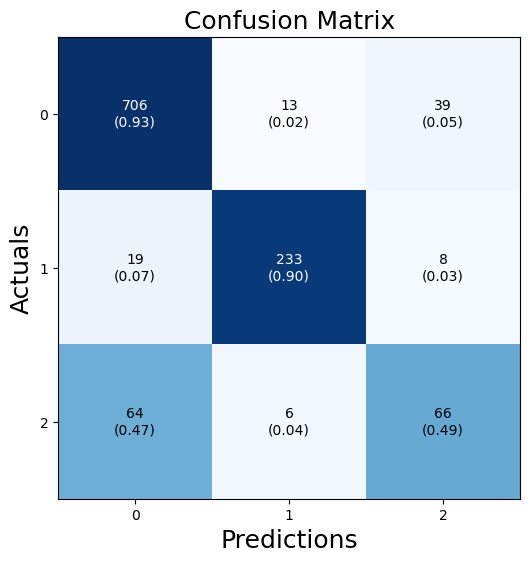

              precision    recall  f1-score   support

           1       0.89      0.93      0.91       758
           2       0.92      0.90      0.91       260
           3       0.58      0.49      0.53       136

    accuracy                           0.87      1154
   macro avg       0.80      0.77      0.78      1154
weighted avg       0.86      0.87      0.87      1154


	Train_Set



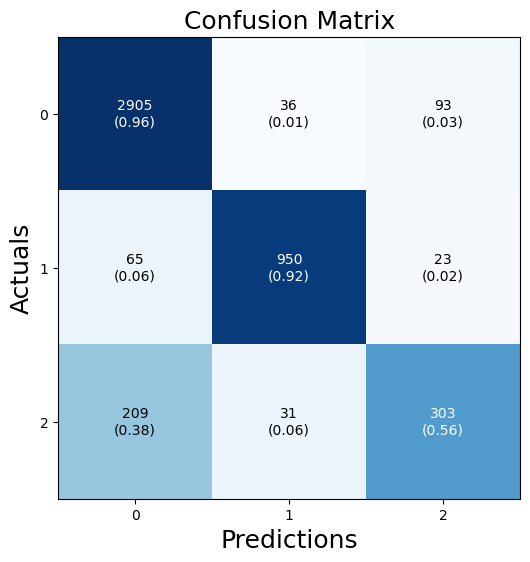


              precision    recall  f1-score   support

           1       0.91      0.96      0.94      3034
           2       0.93      0.92      0.92      1038
           3       0.72      0.56      0.63       543

    accuracy                           0.90      4615
   macro avg       0.86      0.81      0.83      4615
weighted avg       0.90      0.90      0.90      4615



In [82]:
eval_metric(pipe_svc_op_os, X_train, y_train, X_test, y_test)

### Oversampling XGBoost 

In [83]:
steps_xg_op_os = [("OrdinalEncoder", cols_trans_ord),  ('over', over_xg),
               ("xgboost", xgb.XGBClassifier(n_estimators = 200,
              max_depth= 4,
              learning_rate = 0.2,
              subsample= 0.8,
              colsample_bytree= 1, random_state=42))]
pipe_xg_os = Pipeline(steps=steps_xg_op_os)
pipe_xg_os.fit(X_train, y_train_le)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference',
                                                   'PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('over',
                 SMOTE(random_state=101, sam...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

	Test_Set



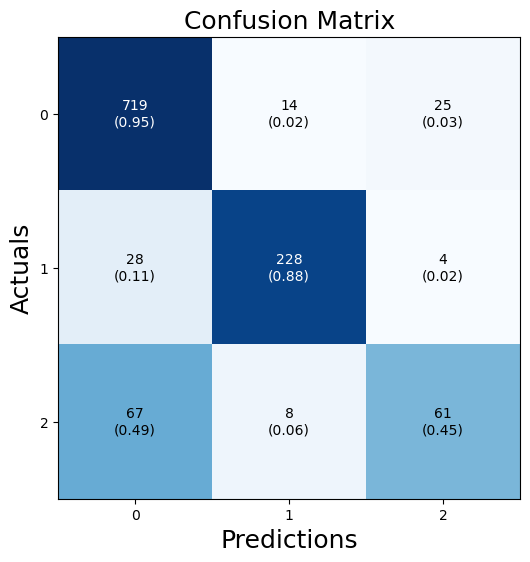

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       758
           1       0.91      0.88      0.89       260
           2       0.68      0.45      0.54       136

    accuracy                           0.87      1154
   macro avg       0.82      0.76      0.78      1154
weighted avg       0.87      0.87      0.87      1154


	Train_Set



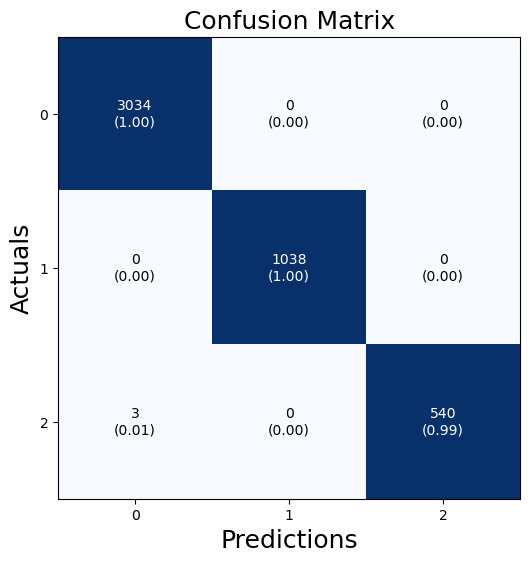


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      0.99      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [84]:
eval_metric(pipe_xg_os, X_train, y_train_le, X_test, y_test_le)

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [85]:
mathews_coefficients = pd.DataFrame({'Values': [matthews_corrcoef(y_test, pipe_os_lr.predict(X_test)),
                                      matthews_corrcoef(y_test, pipe_svc_op_os.predict(X_test)),
                                      matthews_corrcoef(y_test, pipe_xg_os.predict(X_test))],
                        'Models': ['Logistic Regression', 'SVC', 'XGBoost']})
mathews_coefficients

Values               Models
0  0.755716  Logistic Regression
1  0.737782                  SVC
2 -0.303160              XGBoost

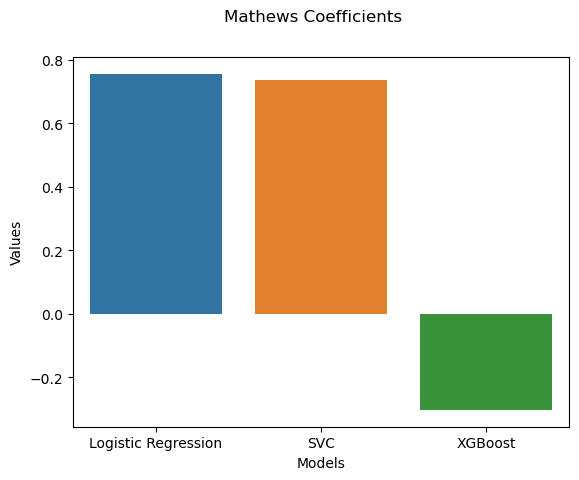

In [86]:
sns.barplot(data = mathews_coefficients, x = 'Models', y = 'Values')
plt.suptitle('Mathews Coefficients');

In [87]:
kappa_score = pd.DataFrame({'Values': [cohen_kappa_score(y_test, pipe_os_lr.predict(X_test)),
                                      cohen_kappa_score(y_test, pipe_svc_op_os.predict(X_test)),
                                      cohen_kappa_score(y_test, pipe_xg_os.predict(X_test))],
                        'Models': ['Logistic Regression', 'SVC', 'XGBoost']})
kappa_score

Values               Models
0  0.755069  Logistic Regression
1  0.736589                  SVC
2 -0.171724              XGBoost

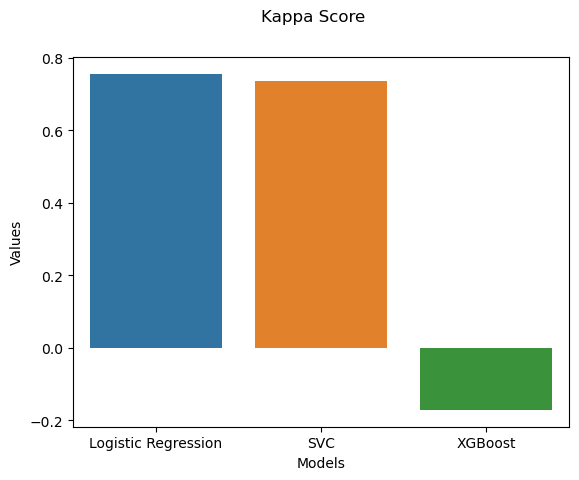

In [88]:
sns.barplot(data = kappa_score, x = 'Models', y = 'Values')
plt.suptitle('Kappa Score');

Logistic Regression is the best performing model.

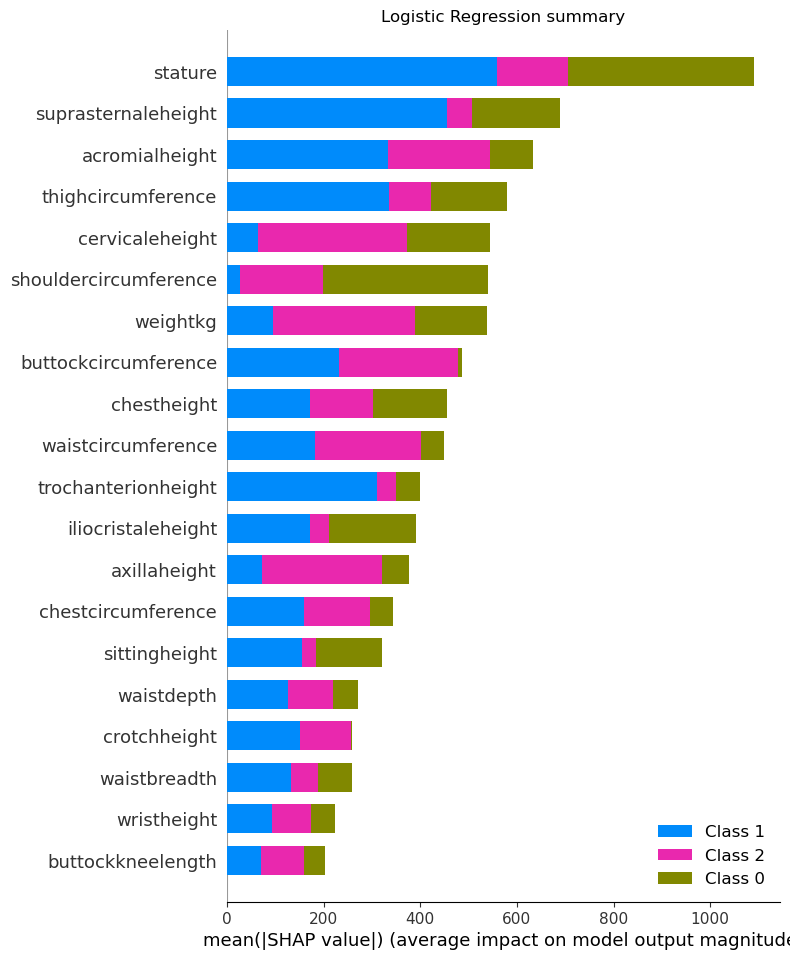

In [89]:
X_t_lr = cols_transformer.fit_transform(X_train)
explainer = shap.Explainer(pipe_os_lr.named_steps.logistic, X_t_lr )
shap_values_lr = explainer.shap_values(X_t_lr)
shap.summary_plot(shap_values_lr, X_t_lr, show = False)
plt.title('Logistic Regression summary')
plt.show();

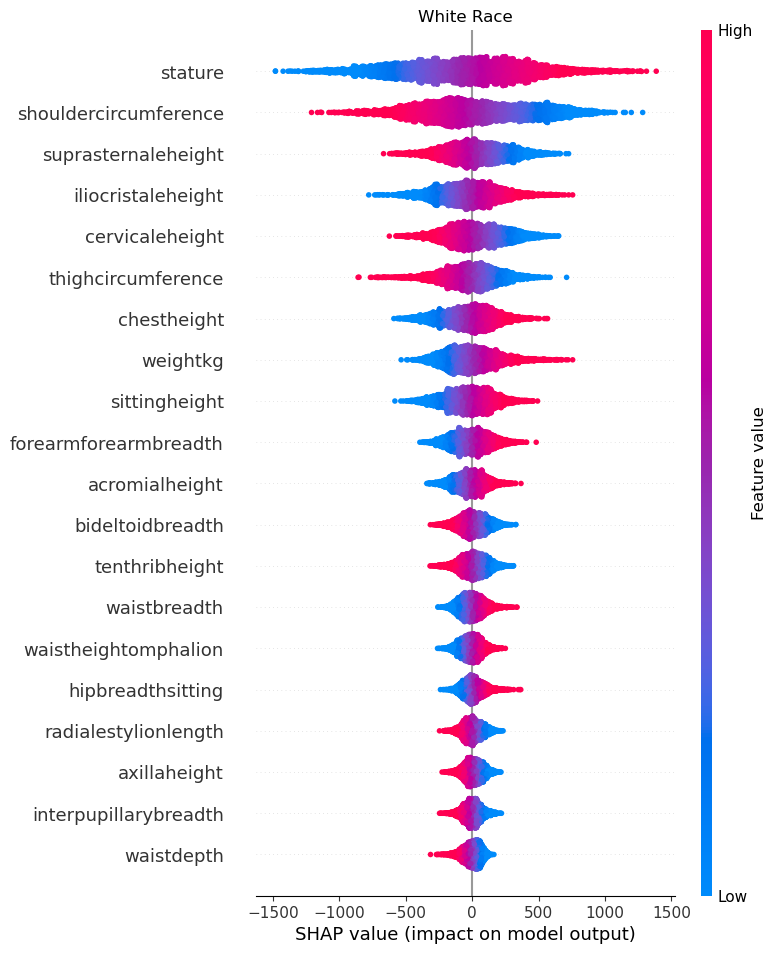

In [90]:
shap.summary_plot(shap_values_lr[0], X_t_lr, show = False)
plt.title('White Race')
plt.show();

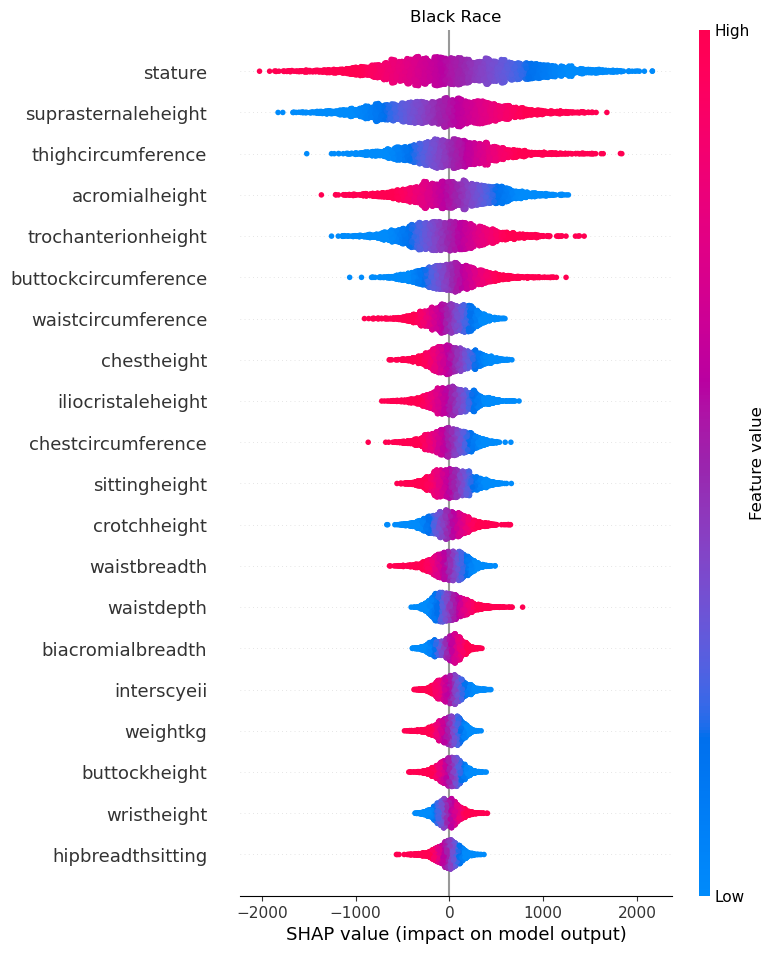

In [91]:
shap.summary_plot(shap_values_lr[1], X_t_lr, show = False)
plt.title('Black Race')
plt.show();

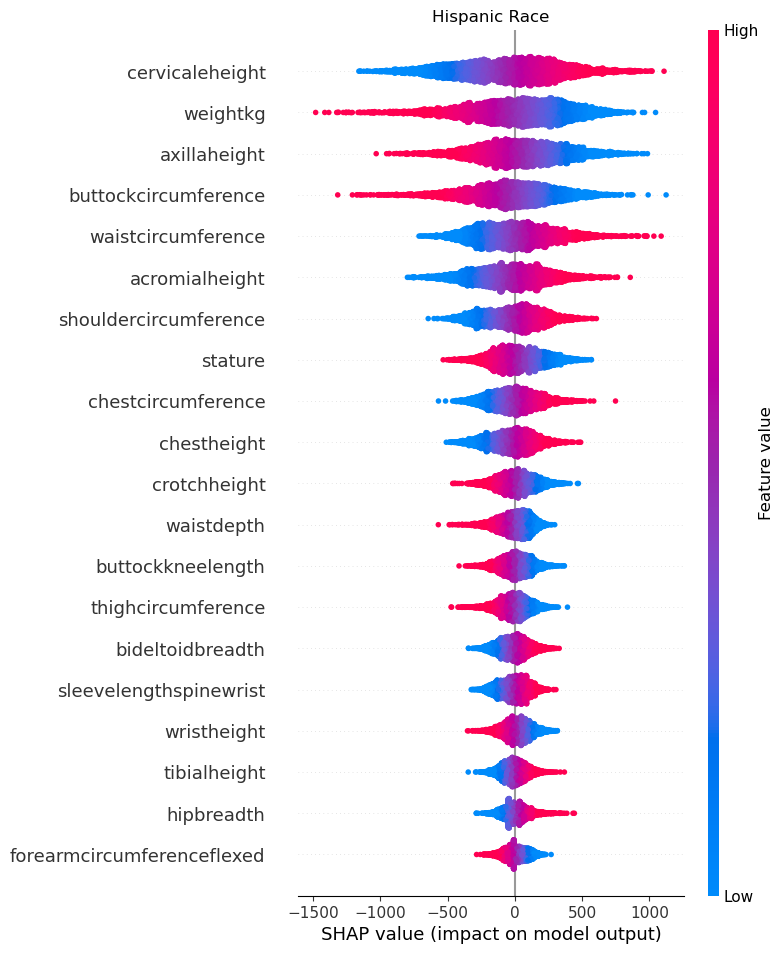

In [92]:
shap.summary_plot(shap_values_lr[2], X_t_lr, show = False)
plt.title('Hispanic Race')
plt.show();

### Refitting the model with the selected features

In [95]:
x_feat = df[['axillaheight', 'buttockkneelength', 'weightkg', 'crotchheight',
             'buttockcircumference', 'wristheight', 'forearmcircumferenceflexed']]
       
y_feat = df['DODRace']

In [96]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(x_feat, y_feat,
                                                                        test_size = 0.2,
                                                                        stratify = y_feat,
                                                                        random_state = 42)

In [97]:
steps_feat = [('scaler', qt), ('logistic', 
                               LogisticRegression(C = 13, penalty = 'l2', class_weight = 'balanced',
                                              solver = 'liblinear'))]
pipe_lr_feat = Pipeline(steps = steps_feat)
pipe_lr_feat.fit(X_train_feat, y_train_feat)

Pipeline(steps=[('scaler', QuantileTransformer()),
                ('logistic',
                 LogisticRegression(C=13, class_weight='balanced',
                                    solver='liblinear'))])

	Test_Set



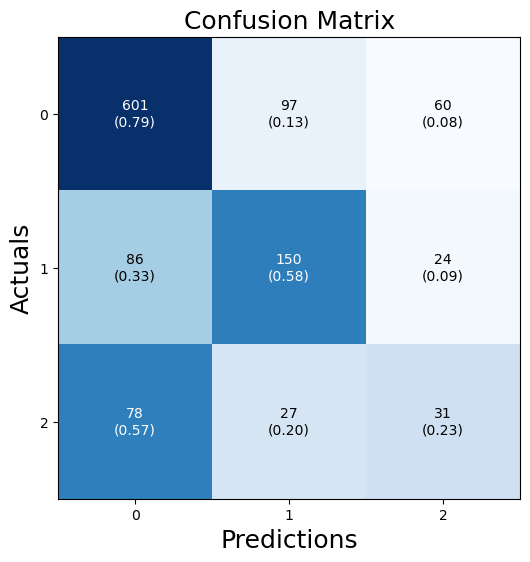

              precision    recall  f1-score   support

           1       0.79      0.79      0.79       758
           2       0.55      0.58      0.56       260
           3       0.27      0.23      0.25       136

    accuracy                           0.68      1154
   macro avg       0.53      0.53      0.53      1154
weighted avg       0.67      0.68      0.67      1154


	Train_Set



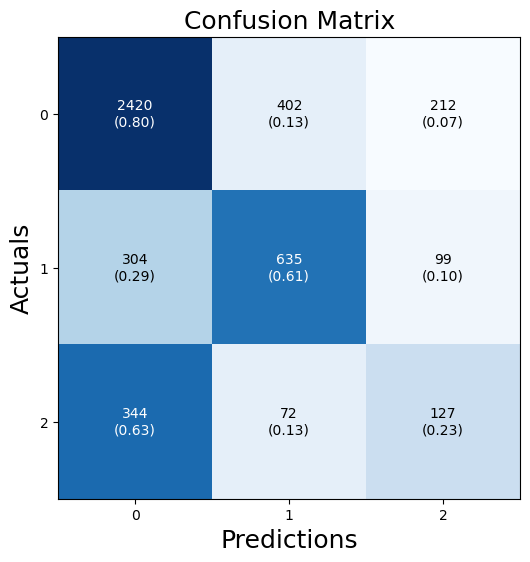


              precision    recall  f1-score   support

           1       0.79      0.80      0.79      3034
           2       0.57      0.61      0.59      1038
           3       0.29      0.23      0.26       543

    accuracy                           0.69      4615
   macro avg       0.55      0.55      0.55      4615
weighted avg       0.68      0.69      0.68      4615



In [98]:
eval_metric(pipe_lr_feat, X_train_feat, y_train_feat, X_test_feat, y_test_feat)

Perfromed worse. There are hidden relationships between features.

### checking the most important features for the hispnic class using lasso.

In [100]:
steps_lr_h_op_testing = [('transformer', cols_trans), ("scaler", qt),
                     ("logistic", LogisticRegression(C = 13, penalty = 'l1', class_weight = 'balanced', solver = 'liblinear'))]
pipe_lr_h_op_testing = Pipeline(steps = steps_lr_h_op_testing)
pipe_lr_h_op_testing.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', QuantileTransformer()),
                ('logistic',
                 LogisticRegression(C=13, class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

	Test_Set



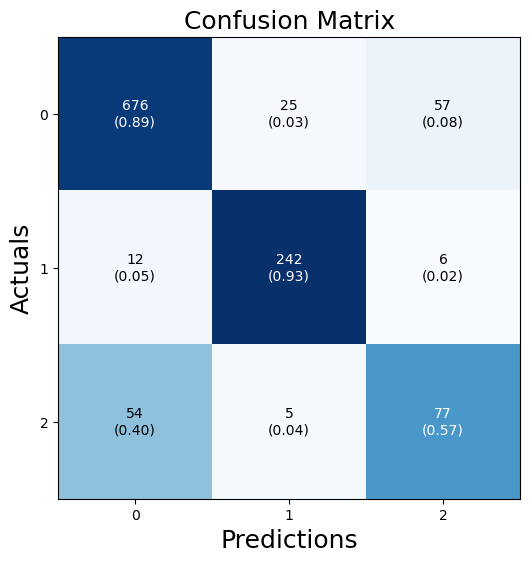

              precision    recall  f1-score   support

           1       0.91      0.89      0.90       758
           2       0.89      0.93      0.91       260
           3       0.55      0.57      0.56       136

    accuracy                           0.86      1154
   macro avg       0.78      0.80      0.79      1154
weighted avg       0.86      0.86      0.86      1154


	Train_Set



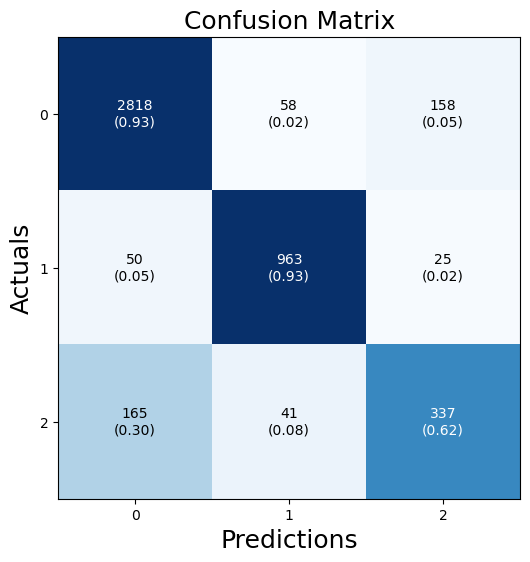


              precision    recall  f1-score   support

           1       0.93      0.93      0.93      3034
           2       0.91      0.93      0.92      1038
           3       0.65      0.62      0.63       543

    accuracy                           0.89      4615
   macro avg       0.83      0.83      0.83      4615
weighted avg       0.89      0.89      0.89      4615



In [101]:
eval_metric(pipe_lr_h_op_testing, X_train, y_train, X_test, y_test)

In [102]:
df_feat_imp_testing =pd.DataFrame(data=(pipe_lr_h_op_testing.named_steps.logistic.coef_).T,
                         index=pipe_lr_h_op_testing.named_steps.transformer.get_feature_names_out(),
                         columns=['White', 'Black', 'Hispanic']).sort_values("Hispanic")


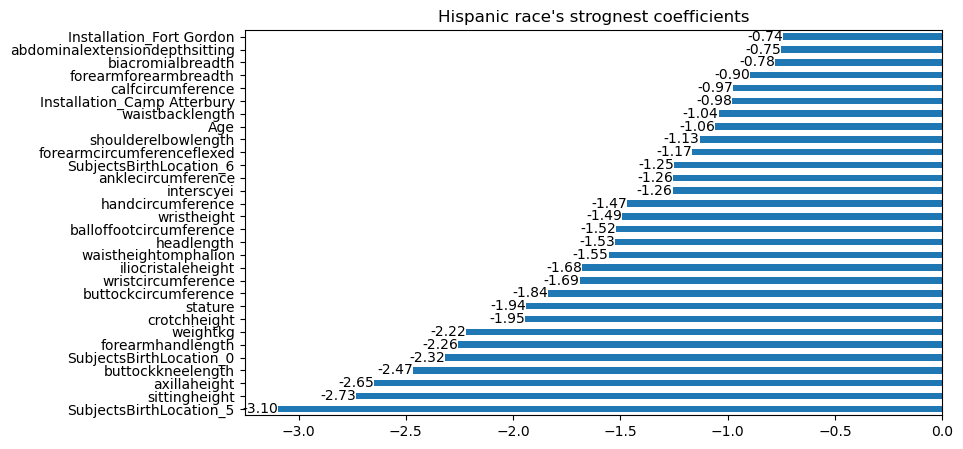

In [103]:
plt.figure(figsize=(9,5))
ax = df_feat_imp_testing["Hispanic"].sort_values()[:30].plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_title("Hispanic race's strognest coefficients");

### Recursive Feature Elimination

In [105]:
#After some experimentaion, 82 was the best value
rfe = RFE(estimator= LogisticRegression(), n_features_to_select=82)
steps_os_feat = [('transformer', cols_transformer), ('over', over), ('scaler', qt), ('rfe', rfe), 
            ('logistic', LogisticRegression(C = 13, penalty = 'l2', class_weight = 'balanced', solver = 'liblinear'))]
pipe_os_lr_feat = Pipeline(steps=steps_os_feat)
pipe_os_lr_feat.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('over',
                 SMOTE(random_state=101, sampling_strategy={2: 3034, 3: 3034})),
                ('scaler', QuantileTransformer()),
                ('rfe',
                 RFE(estimator=LogisticRegression(), n_features_to_select=82)),
                ('logistic',
                 LogisticRegression(C=13, class_weight='balanced',
                                    solver='liblinear'))])

	Test_Set



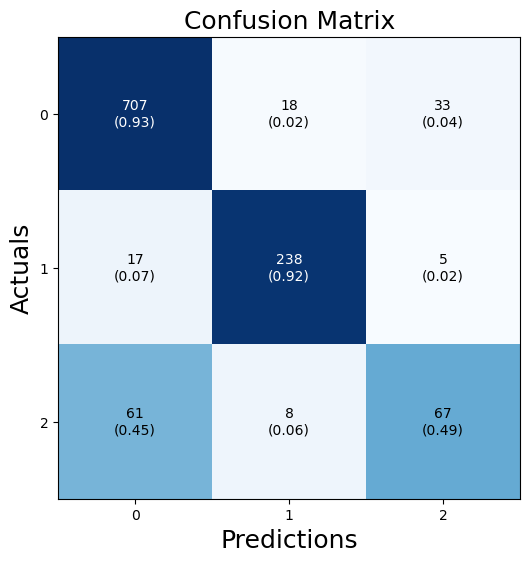

              precision    recall  f1-score   support

           1       0.90      0.93      0.92       758
           2       0.90      0.92      0.91       260
           3       0.64      0.49      0.56       136

    accuracy                           0.88      1154
   macro avg       0.81      0.78      0.79      1154
weighted avg       0.87      0.88      0.87      1154


	Train_Set



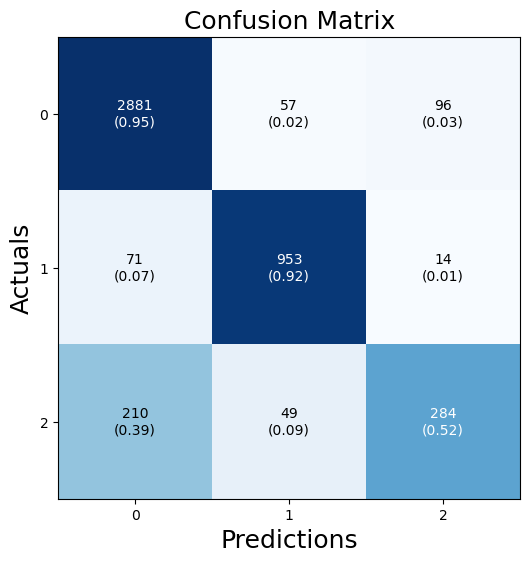


              precision    recall  f1-score   support

           1       0.91      0.95      0.93      3034
           2       0.90      0.92      0.91      1038
           3       0.72      0.52      0.61       543

    accuracy                           0.89      4615
   macro avg       0.84      0.80      0.82      4615
weighted avg       0.89      0.89      0.89      4615



In [106]:
eval_metric(pipe_os_lr_feat, X_train, y_train, X_test, y_test)

Still performs worse than SMOTE.

### PCA for feature selection

In [127]:
#making transformer to only numerical data
pca = PCA(n_components = 30)
num_cols = X.select_dtypes(include = 'number').columns
PCA_transformed = make_column_transformer((qt, num_cols), (pca, num_cols), 
                                           remainder='passthrough', verbose_feature_names_out=False)

In [141]:
steps_pca = [('transformer', cols_transformer), ('scaling_pca', PCA_transformed),
            ('logistic', LogisticRegression(C = 13, penalty = 'l2', class_weight = 'balanced', solver = 'liblinear'))]
pipe_pca_lr = Pipeline(steps=steps_pca)
pipe_pca_lr.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaling_p...
       'tragiontopofhead', 'trochanterionheight',
       'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth',
       'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'weightkg', 'wristcircumference', 'wristheight',
       'Age'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(C=13, class_weight='balanced',
                                    solver='liblinear'))])

In [142]:
#pipe_pca_lr.named_steps.scaling_pca.named_transformers_.pca.explained_variance_
pca_df = pd.DataFrame({'expl_var': pipe_pca_lr.named_steps.scaling_pca.named_transformers_.pca.explained_variance_ratio_,
                      'pc':range(1, 31), 'cummulative_var':pipe_pca_lr.named_steps.scaling_pca.named_transformers_.pca.explained_variance_ratio_.cumsum()})
pca_df

expl_var  pc  cummulative_var
0   0.666268   1         0.666268
1   0.174948   2         0.841216
2   0.036883   3         0.878099
3   0.024764   4         0.902863
4   0.014824   5         0.917687
5   0.009310   6         0.926997
6   0.007056   7         0.934053
7   0.005710   8         0.939763
8   0.005004   9         0.944767
9   0.004382  10         0.949149
10  0.003673  11         0.952822
11  0.003276  12         0.956098
12  0.002998  13         0.959096
13  0.002882  14         0.961978
14  0.002706  15         0.964684
15  0.002148  16         0.966832
16  0.002022  17         0.968854
17  0.001824  18         0.970677
18  0.001813  19         0.972490
19  0.001619  20         0.974109
20  0.001515  21         0.975624
21  0.001423  22         0.977047
22  0.001258  23         0.978305
23  0.001204  24         0.979508
24  0.001138  25         0.980646
25  0.001039  26         0.981685
26  0.001026  27         0.982711
27  0.000973  28         0.983683
28  0.000886  29         0.984569
29  0.000804  30         0.985373

I get 98% of information from 30 principal components.

	Test_Set



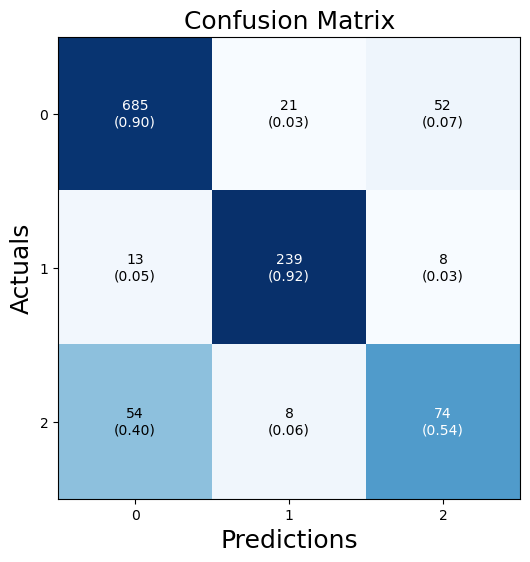

              precision    recall  f1-score   support

           1       0.91      0.90      0.91       758
           2       0.89      0.92      0.91       260
           3       0.55      0.54      0.55       136

    accuracy                           0.86      1154
   macro avg       0.78      0.79      0.79      1154
weighted avg       0.86      0.86      0.86      1154


	Train_Set



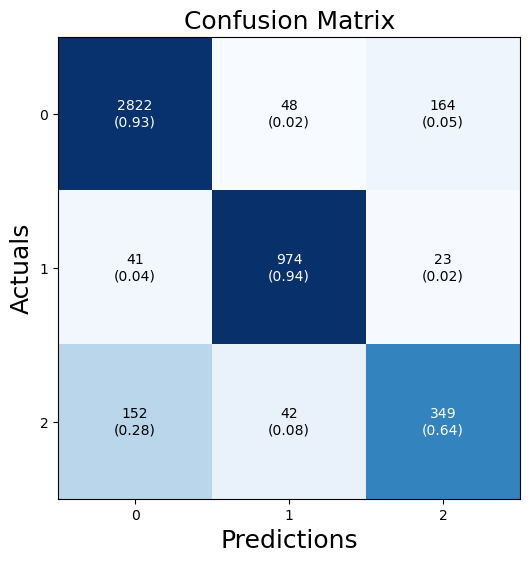


              precision    recall  f1-score   support

           1       0.94      0.93      0.93      3034
           2       0.92      0.94      0.93      1038
           3       0.65      0.64      0.65       543

    accuracy                           0.90      4615
   macro avg       0.83      0.84      0.84      4615
weighted avg       0.90      0.90      0.90      4615



In [143]:
eval_metric(pipe_pca_lr, X_train, y_train, X_test, y_test)

The oversampled logistic regression still performs the best when it comes to hispanic race.

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [144]:
pipe_os_lr.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'WritingPreference']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['PrimaryMOS',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('over',
                 SMOTE(random_state=101, sampling_strategy={2: 3034, 3: 3034})),
                ('scaler', QuantileTransformer()),
                ('logistic',
                 LogisticRegression(C=13, class_weight='balanced',
                                    solver='liblinear'))])

In [145]:
pickle.dump(pipe_os_lr, open("race_lr_model.pkl", 'wb'))

References:
    
https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition

https://machinelearningmastery.com/rfe-feature-selection-in-python/

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___